# Wilcoxon Signed-Rank Test
by: *Babak Zolghadr-Asli*

In [1]:
from scipy.stats import wilcoxon
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from pathlib import Path
import seaborn as sns
import os
from joypy import joyplot
from matplotlib import cm

%matplotlib inline

<div class="alert alert-danger">
    <b>SYNTAX GUIDE</b>
</div>

In order for this script/notebook to work, you need to store the files with a specified name-syntax;

* **Step I.** First all the files in specified folders, where the folder name is as the same as the algorithm name.
* **Step II.** If need be, pass the current direcoty that holds the files to `root_directory` as a `str` object; Note that if you are using a windows base machine you have to use `\` to seprate files location in your directory adress.  
* **Step III.** All results must be stored in a csv file, with the name `'a_fb_result.csv` where `a` is a placeholder for the **algorithm name**, and `b` is the number associated for the function. 



* Note that all these files should have a columns `best_OF`.

In [2]:
root_directory = 'C:/Users/bz267/Optimization results/Eliminate vs Preserve'

alg_list_temp = os.listdir(root_directory)
alg_list = [i for i in alg_list_temp if not i.startswith(tuple(str(i) for i in range(10)))]
print('=='*30)
print('The follwing algorithms are to be evaluted in this sessin:')
print('=='*30)
for i, alg_name in enumerate(alg_list):
    print('[%d] %s'%((i+1), alg_name))
print('--'*25)

The follwing algorithms are to be evaluted in this sessin:
[1] Eliminate_take_1
[2] Eliminate_take_2
[3] Eliminate_take_3
[4] Preserve_take_1
[5] Preserve_take_2
[6] Preserve_take_3
[7] Preserve_take_4
[8] Pure_Random
--------------------------------------------------


##### NC

In [3]:
func_num = np.arange(1, 31)

In [4]:
# RAEDING AND CREATING FILES WITH OFS OF ALL FUNCTIONS

for f in func_num:
    globals()['overall_db_f%d'%f] = pd.DataFrame(columns=alg_list)
    for a in alg_list:
        file_name = 'f%d.csv'%(f)
        folder_name = '/%s/NC/'%a
        db = pd.read_csv(root_directory+folder_name+file_name)
        exec("overall_db_f%d[a] = db['best_OF']"%f)
    exec("overall_db_f%d.dropna(inplace=True)"%f)

##### C

In [3]:
func_num = np.array([1, 2, 4, 6, 7])

In [4]:
for f in func_num:
    globals()['overall_db_f%d'%f] = pd.DataFrame(columns=alg_list)
    for a in alg_list:
        file_name = 'f%d.csv'%(f)
        folder_name = '/%s/C/'%a
        db = pd.read_csv(root_directory+folder_name+file_name)
        exec("overall_db_f%d[a] = db['best_OF']"%f)
    exec("overall_db_f%d.dropna(inplace=True)"%f)

<div class="alert alert-success">
    <b>GENERAL PERFORMANCE ANALYSIS</b>
</div>

<div class="alert alert-success">
<b>PLOTS</b>
</div>

<div class='alert alert-warning'>
    Ridgeline Plot
</div>

##### NC

F1


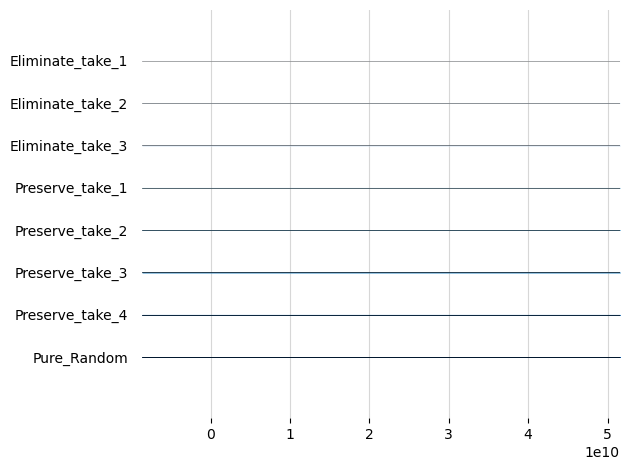

F2


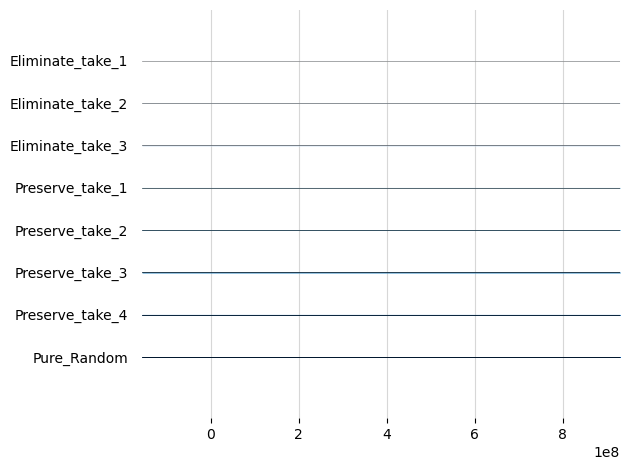

F3


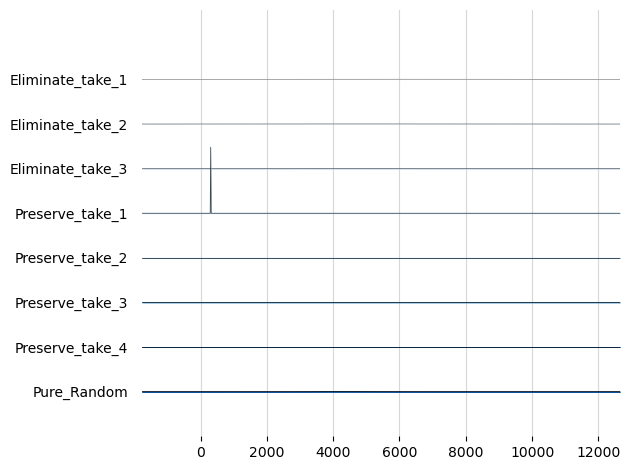

F4


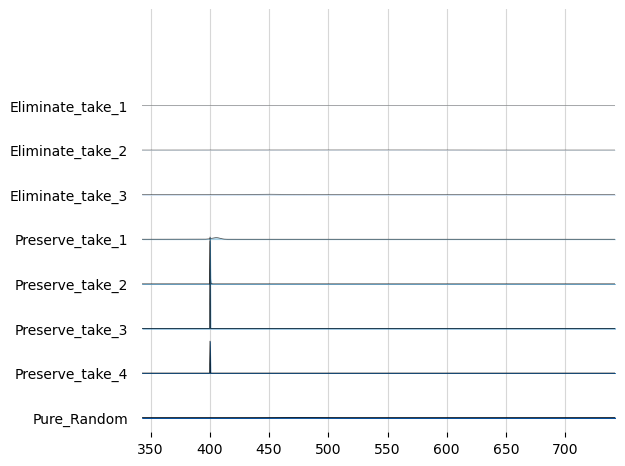

F5


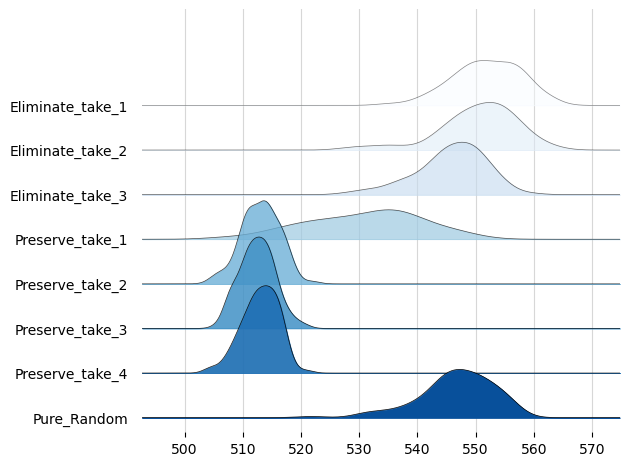

F6


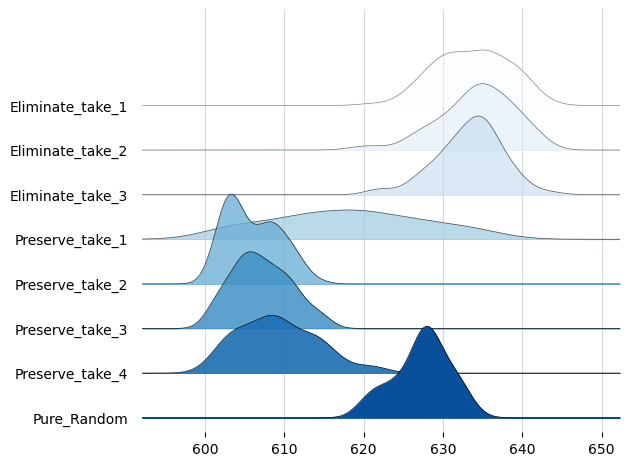

F7


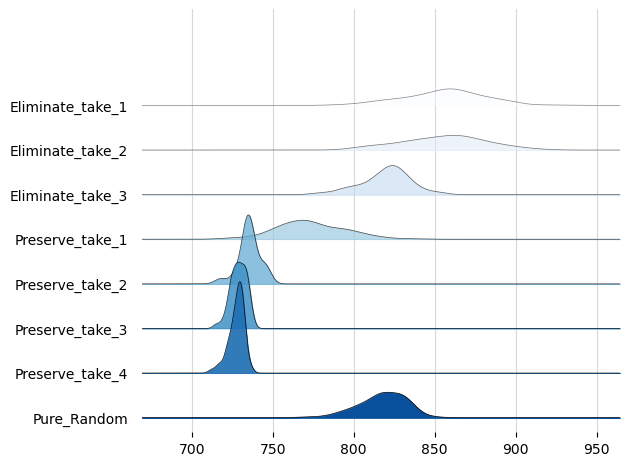

F8


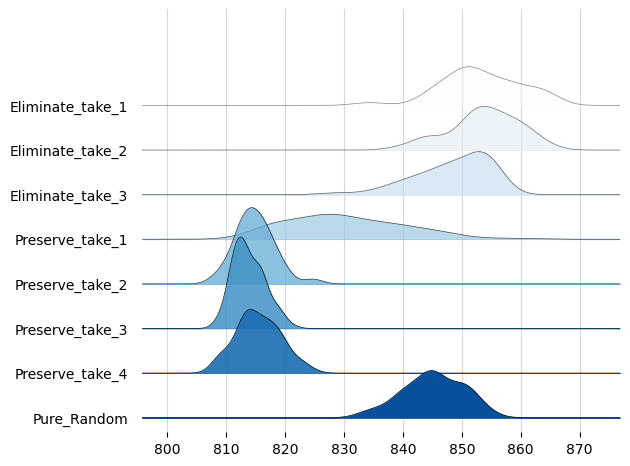

F9


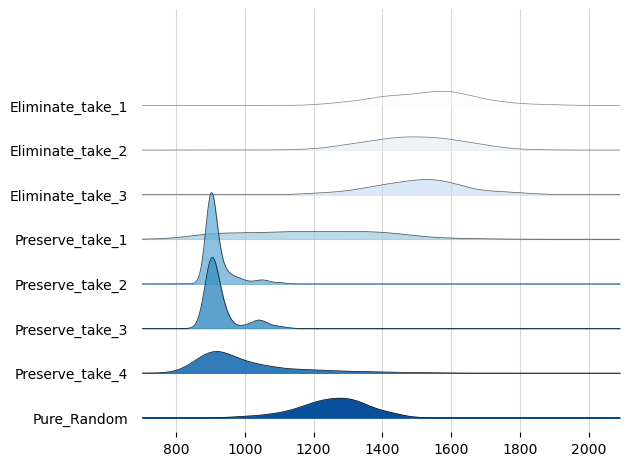

F10


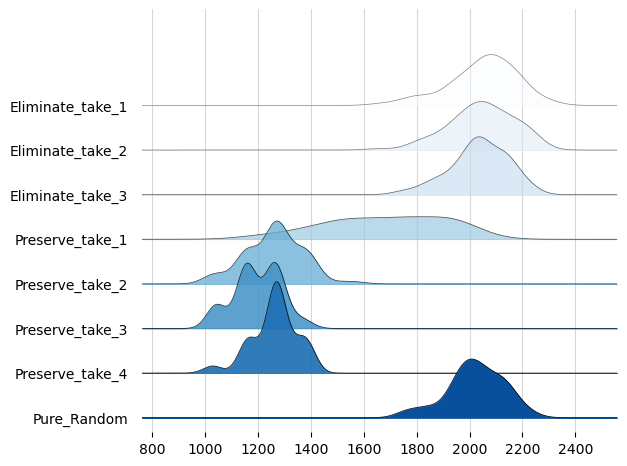

F11


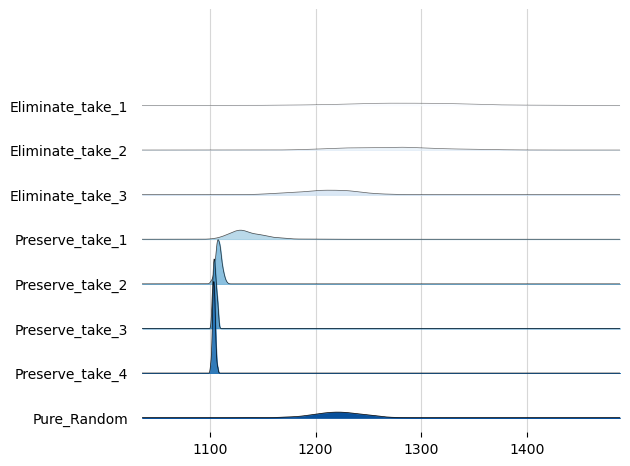

F12


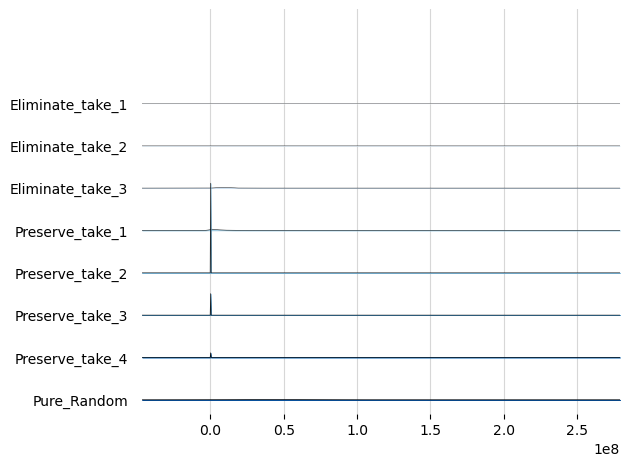

F13


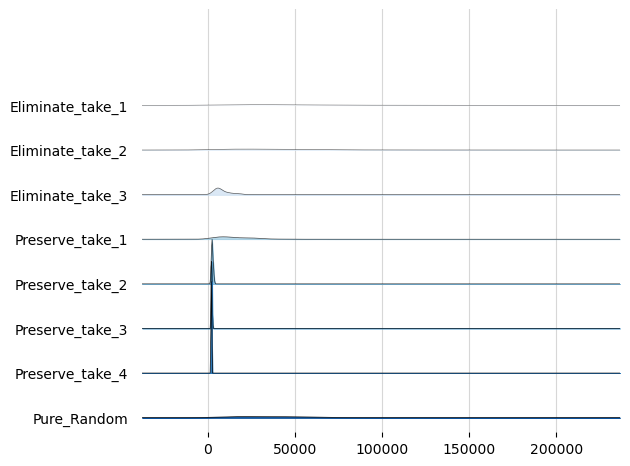

F14


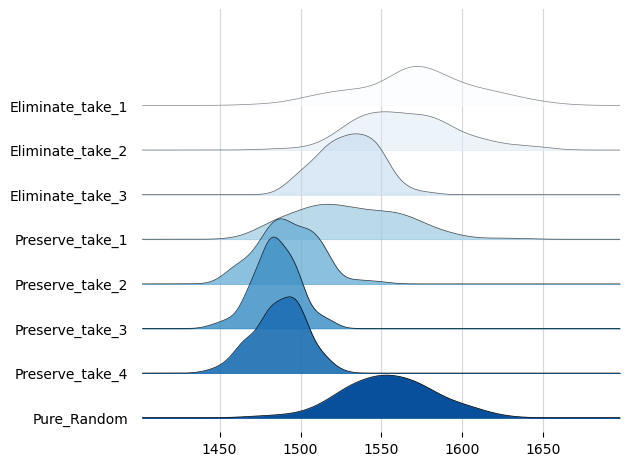

F15


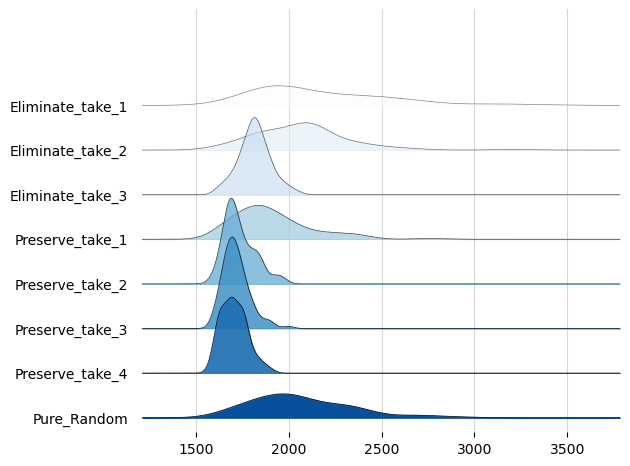

F16


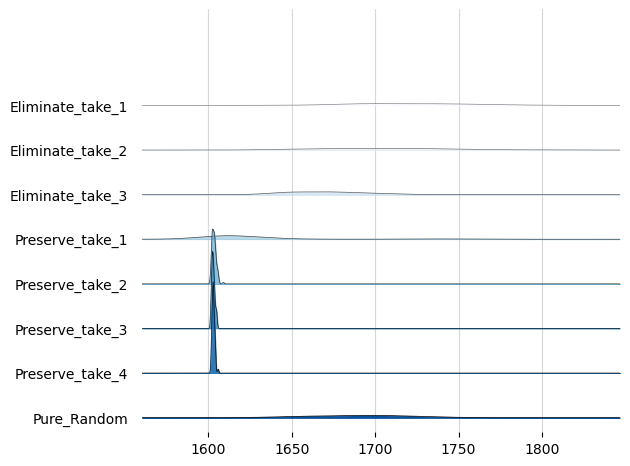

F17


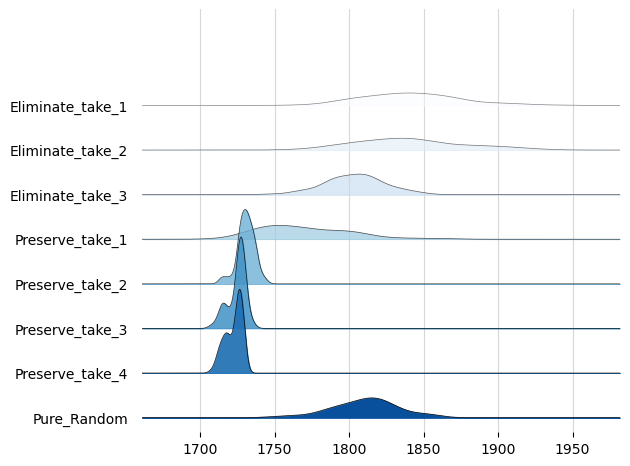

F18


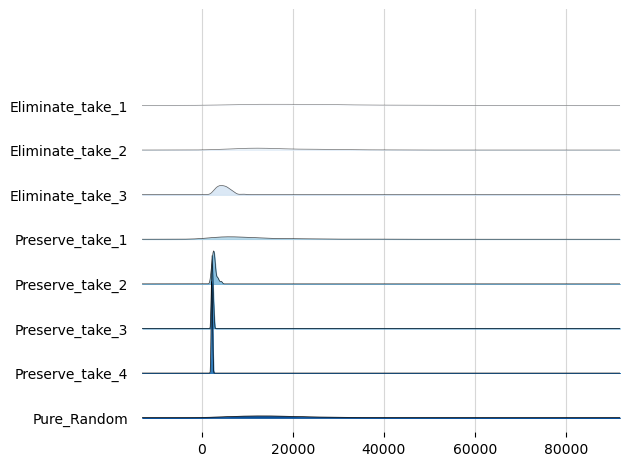

F19


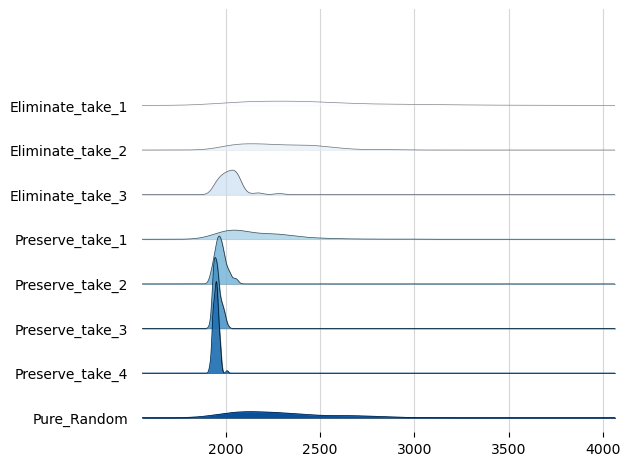

F20


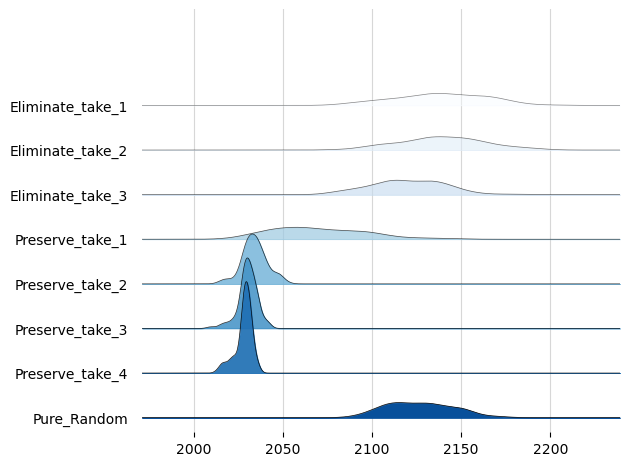

F21


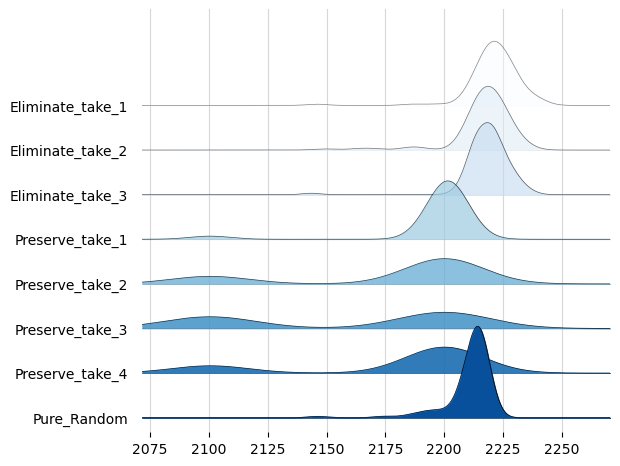

F22


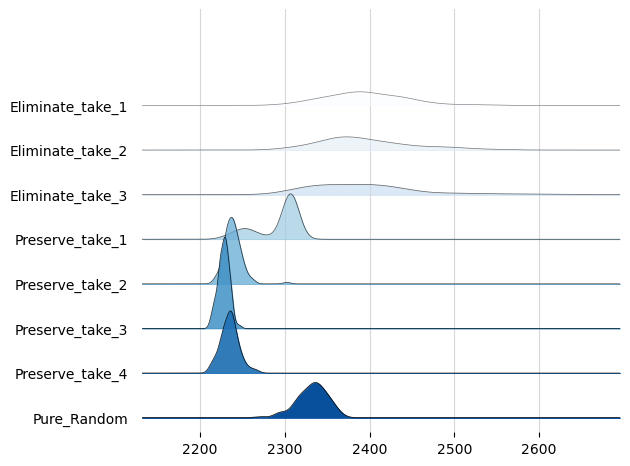

F23


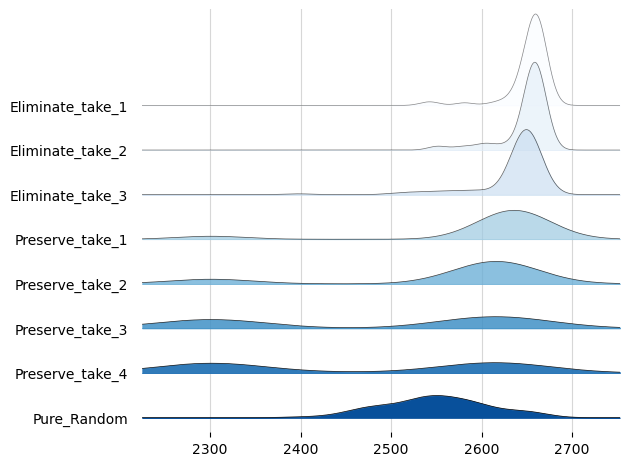

F24


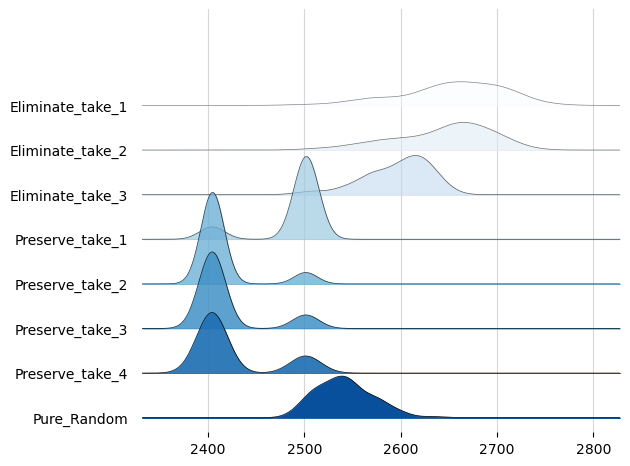

F25


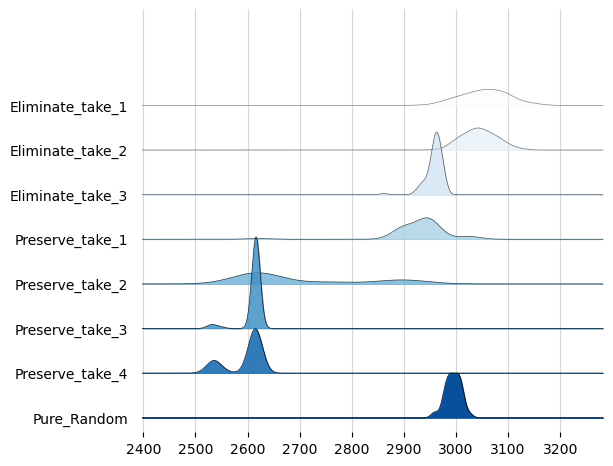

F26


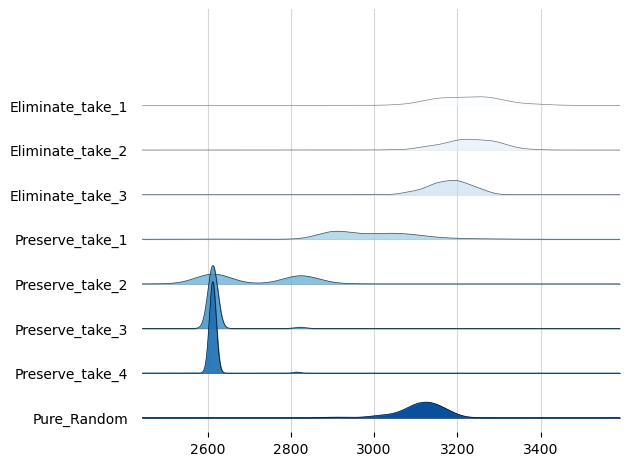

F27


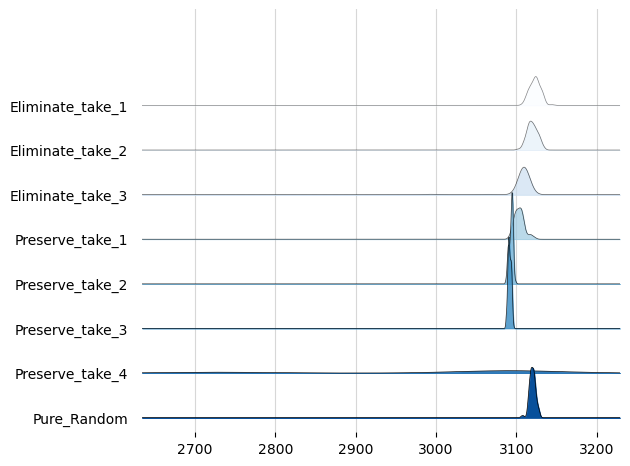

F28


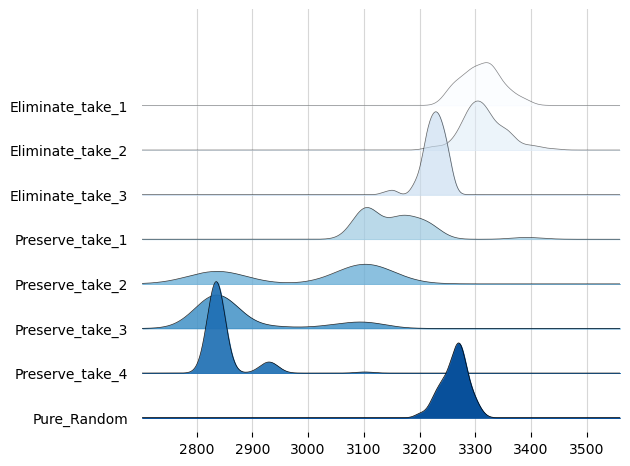

F29


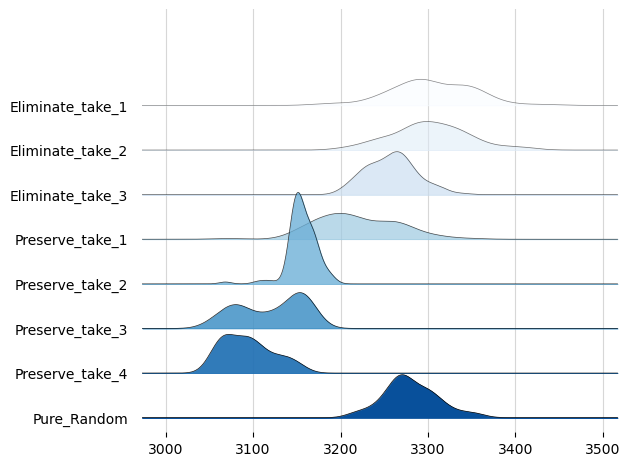

F30


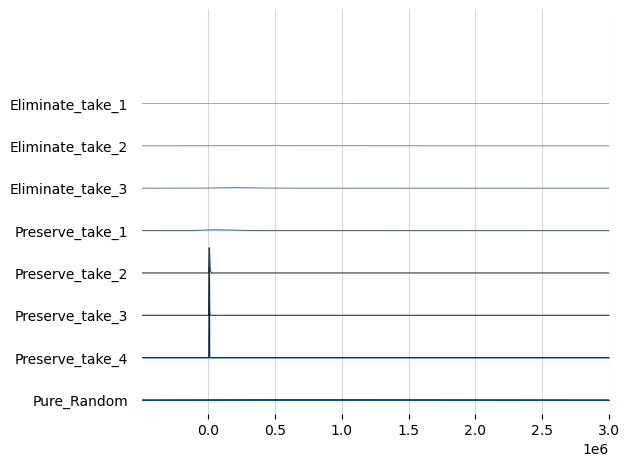

In [5]:
for f in func_num:
    print('F%d'%f)
    temp_df = eval('overall_db_f%d'%f).stack().reset_index().iloc[:,1:]
    temp_df.columns=['Alg_Name', 'Result']
    fig = joyplot(temp_df, by='Alg_Name', column='Result', colormap=cm.Blues, fade=True, lw=.5)
    fig = plt.grid(alpha=.5)
    fig = plt.ylabel(r'$f_{(x)}$')
    folder_name = '/0Summary result/Plots/NC/Ridgeline plot/'
    file_name = 'f%d_ridgeline.png'%(f)
    output_dir = Path(root_directory+folder_name)
    output_dir.mkdir(parents=True, exist_ok=True)
    fig = plt.savefig(output_dir / file_name)
    fig = plt.show()

##### C

F1


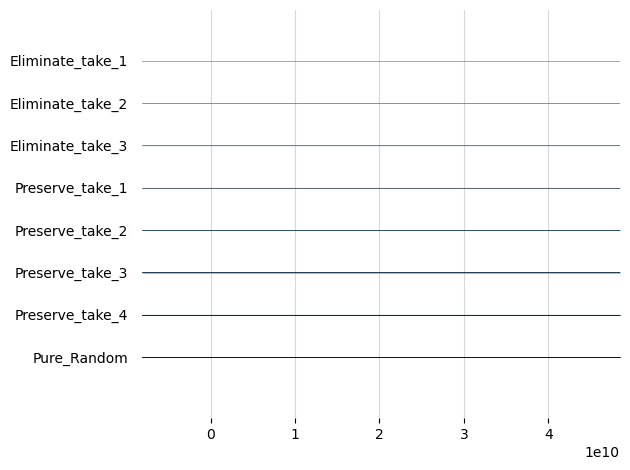

F2


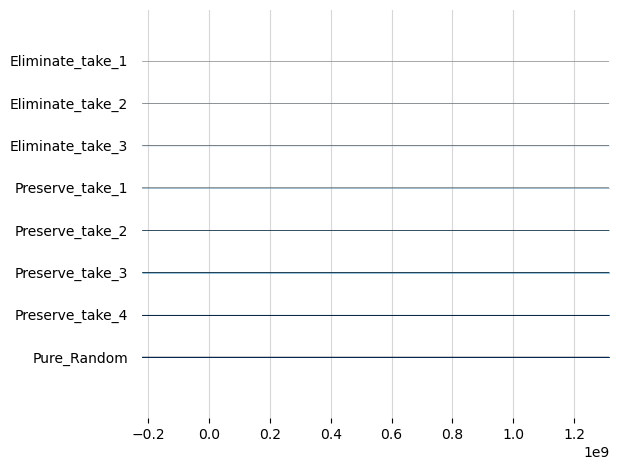

F4


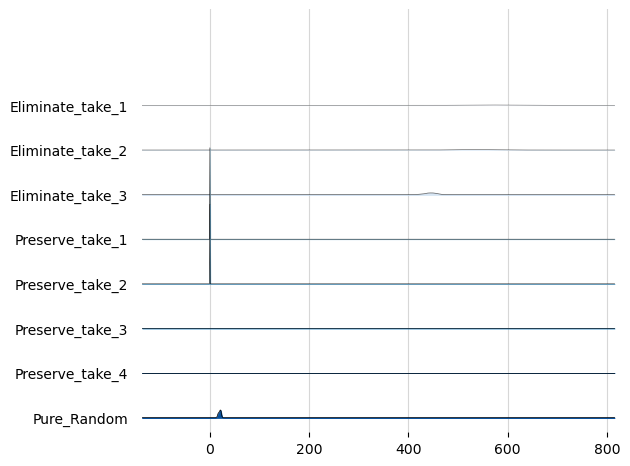

F6


C:\Users\bz267\Anaconda3\lib\site-packages\joypy\joyplot.py:286: UserWarning: The data contains a group with a single distinct value (0.0) having infinite probability density. Consider using a different visualization.
  warnings.warn("The data contains a group with a single distinct value ({}) "


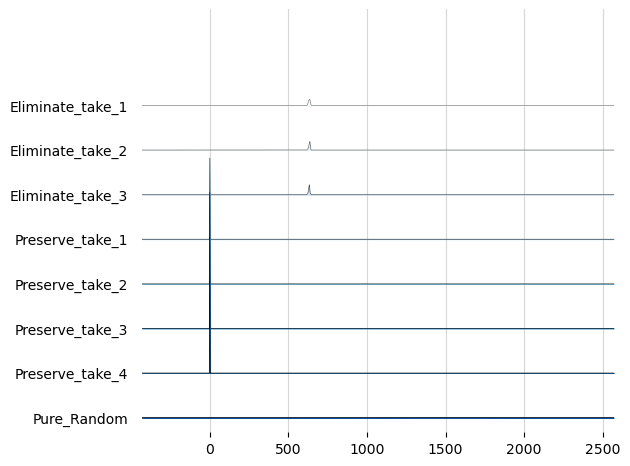

F7


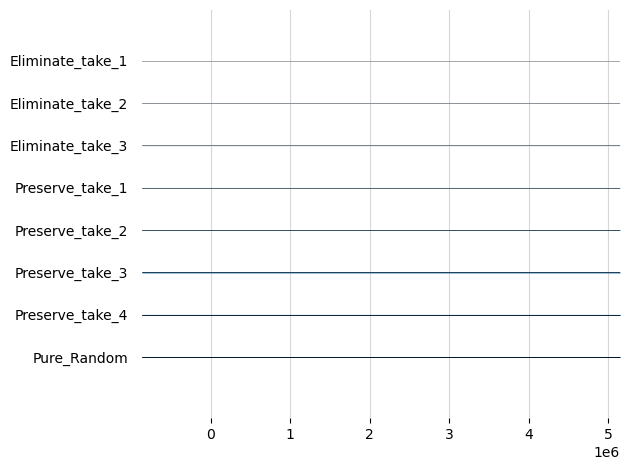

In [5]:
for f in func_num:
    print('F%d'%f)
    temp_df = eval('overall_db_f%d'%f).stack().reset_index().iloc[:,1:]
    temp_df.columns=['Alg_Name', 'Result']
    fig = joyplot(temp_df, by='Alg_Name', column='Result', colormap=cm.Blues, fade=True, lw=.5)
    fig = plt.grid(alpha=.5)
    fig = plt.ylabel(r'$f_{(x)}$')
    folder_name = '/0Summary result/Plots/C/Ridgeline plot/'
    file_name = 'f%d_ridgeline.png'%(f)
    output_dir = Path(root_directory+folder_name)
    output_dir.mkdir(parents=True, exist_ok=True)
    fig = plt.savefig(output_dir / file_name)
    fig = plt.show()

<div class='alert alert-warning'>
    Violin Plot
</div>

##### NC

F1


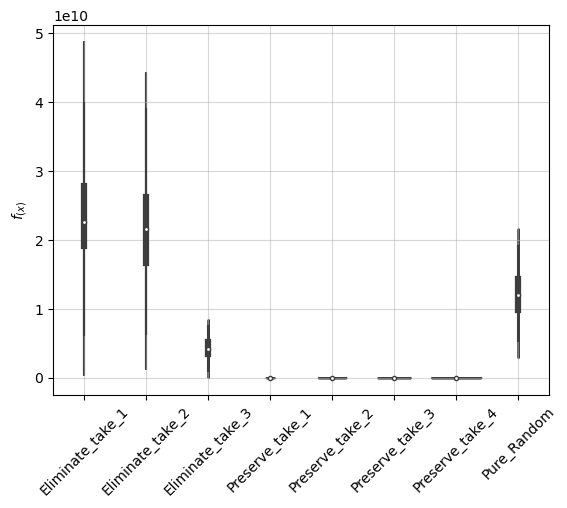

F2


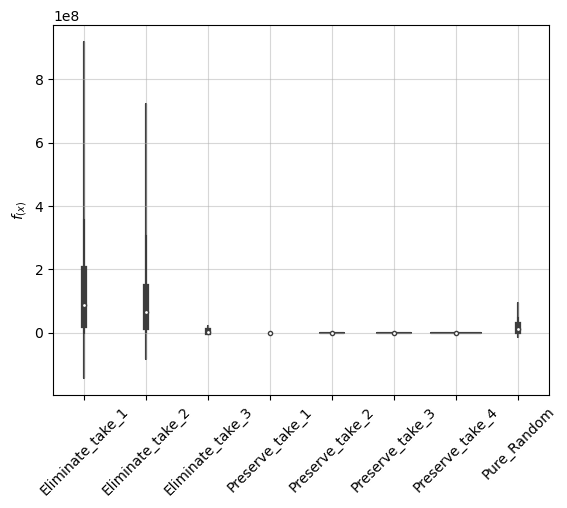

F3


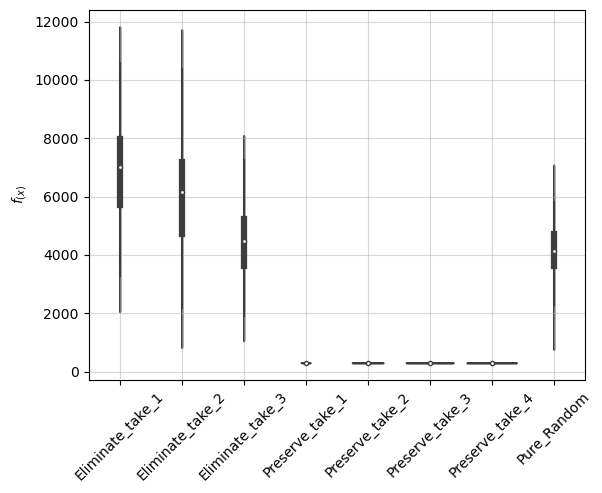

F4


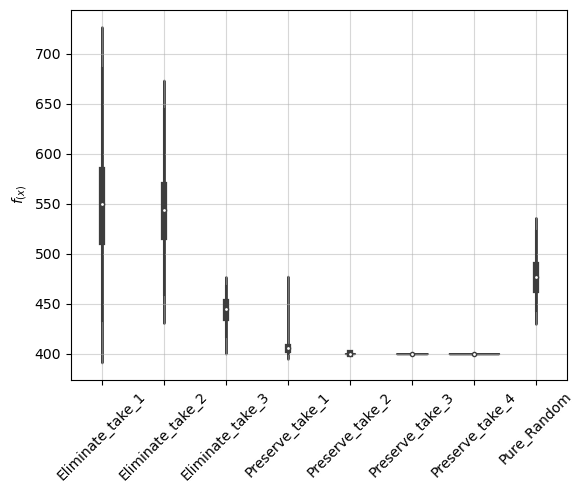

F5


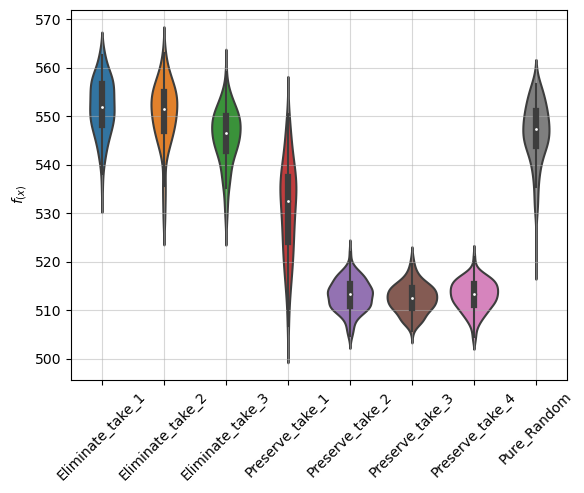

F6


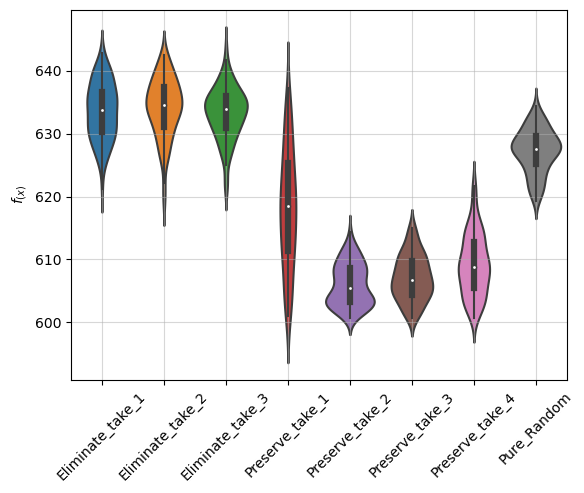

F7


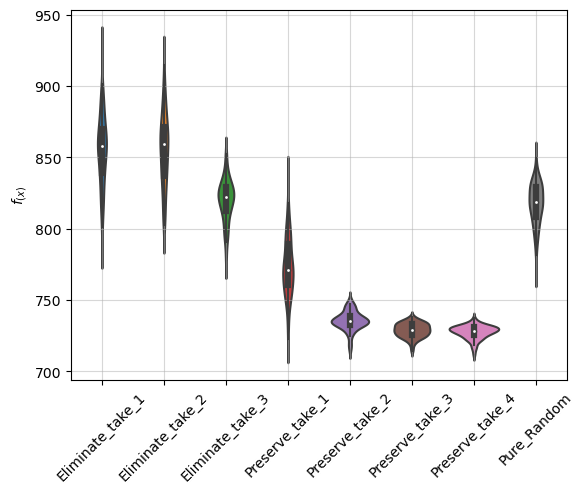

F8


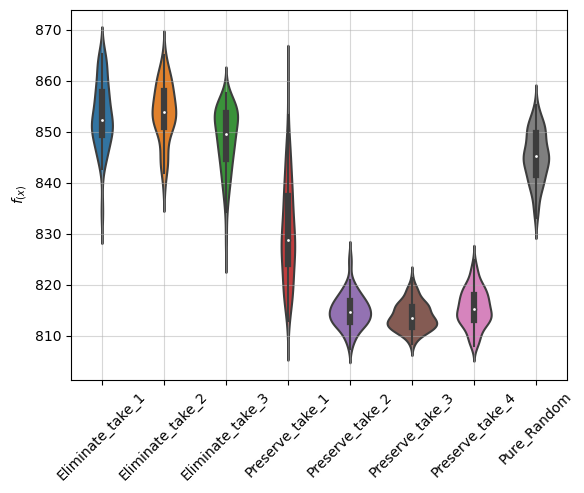

F9


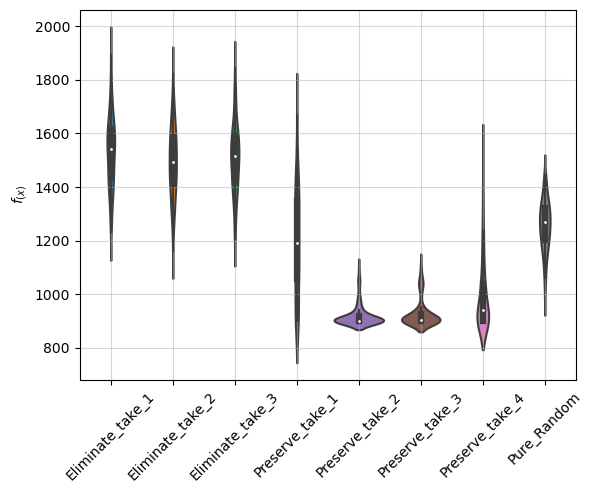

F10


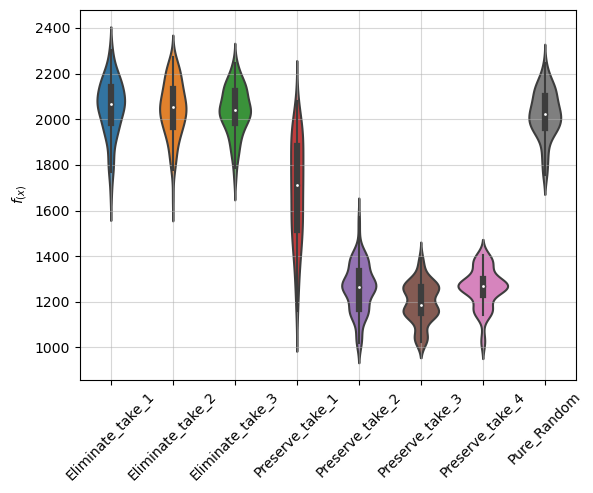

F11


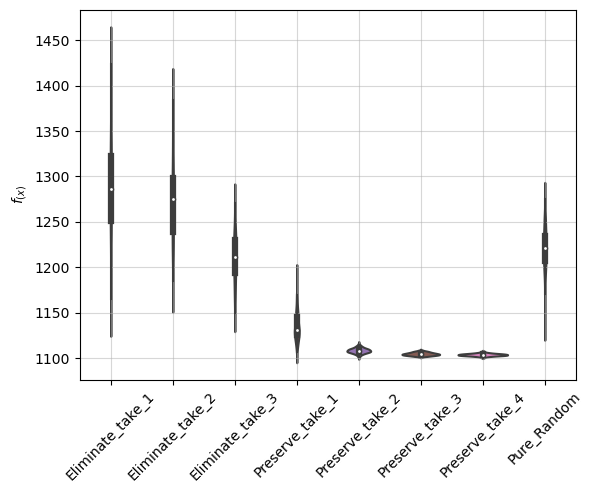

F12


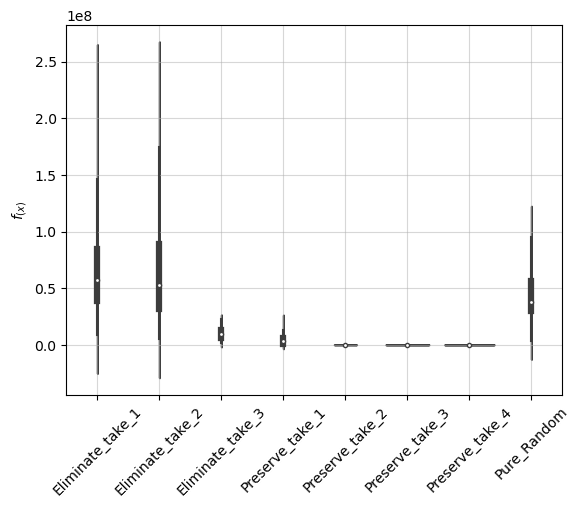

F13


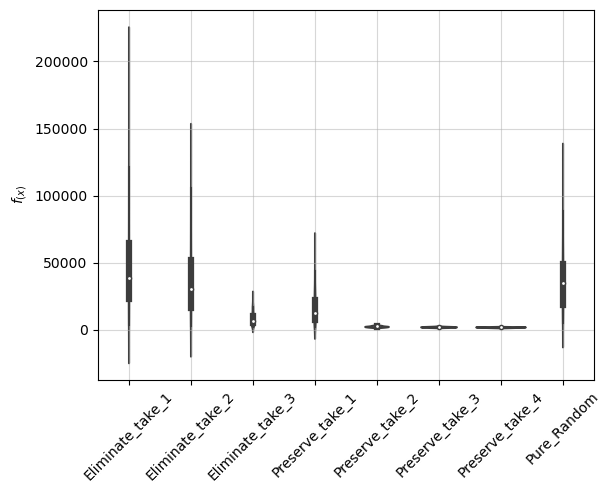

F14


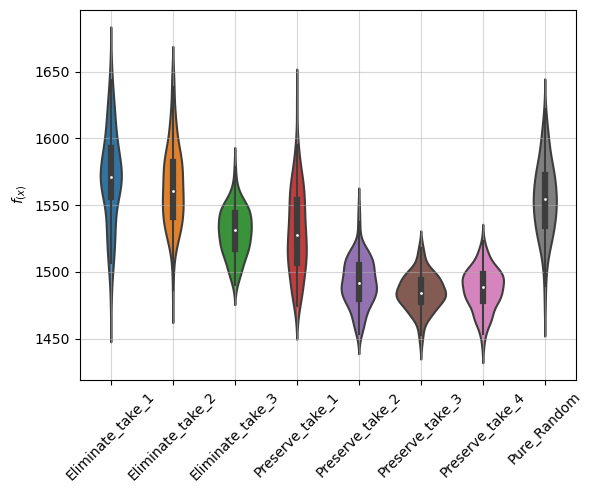

F15


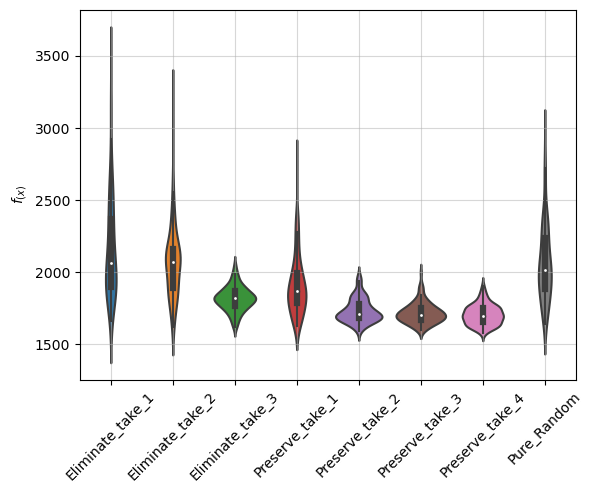

F16


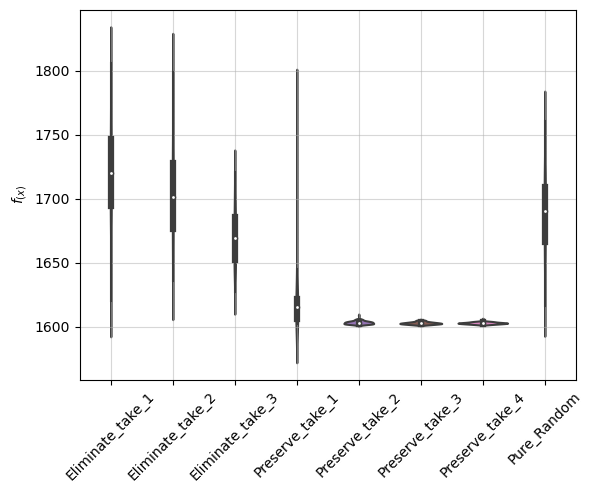

F17


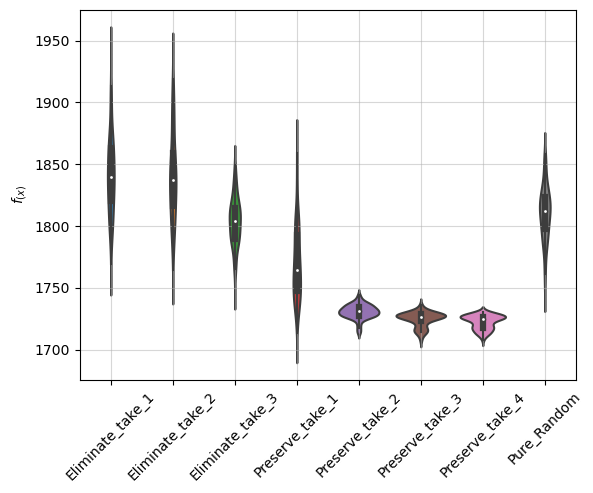

F18


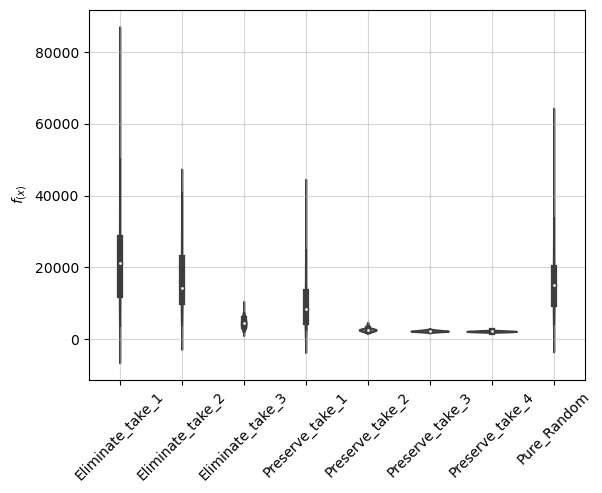

F19


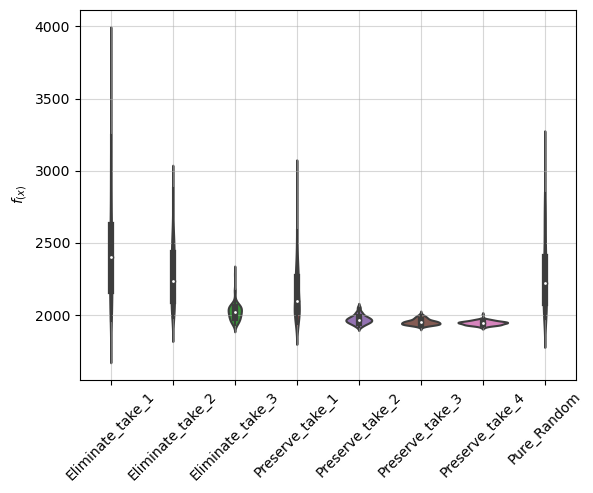

F20


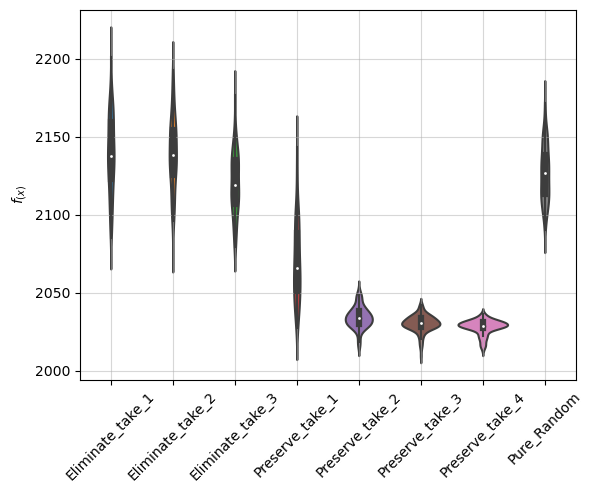

F21


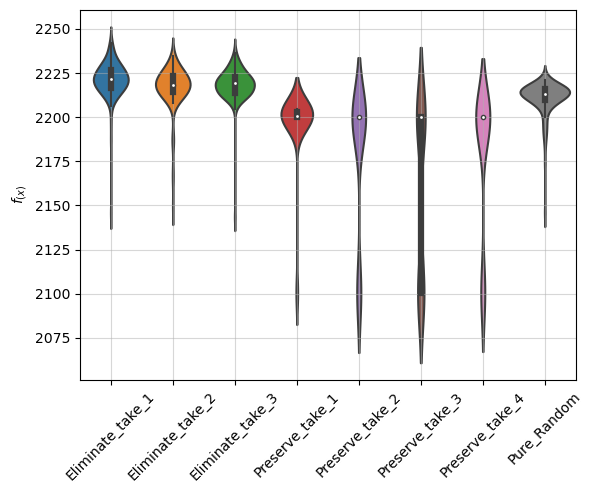

F22


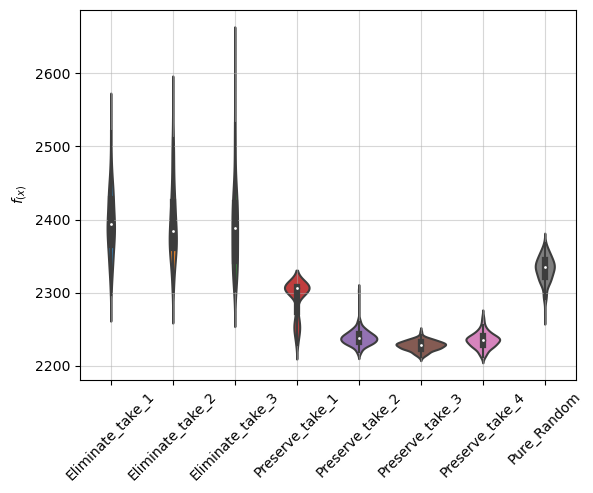

F23


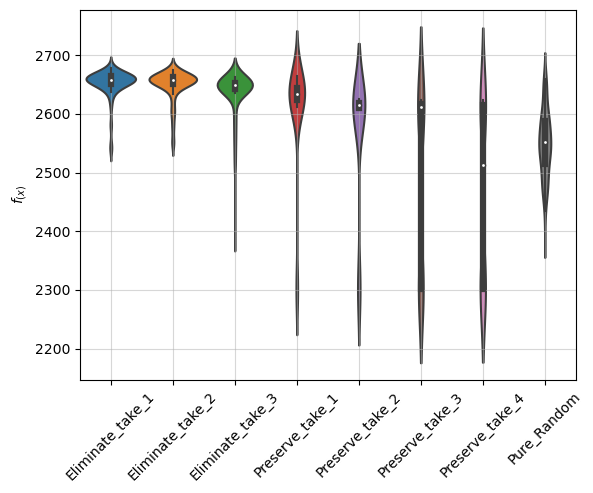

F24


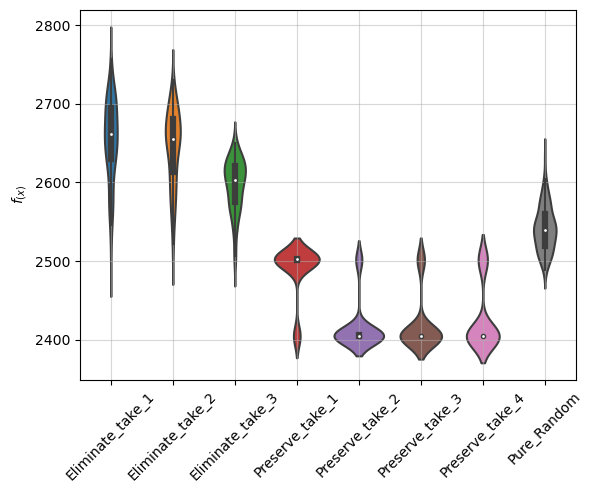

F25


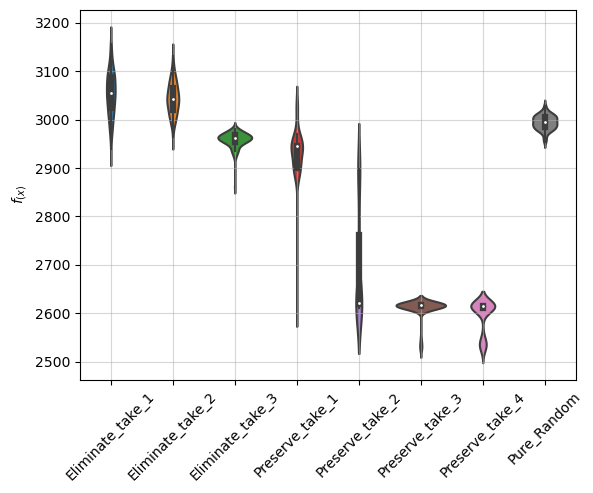

F26


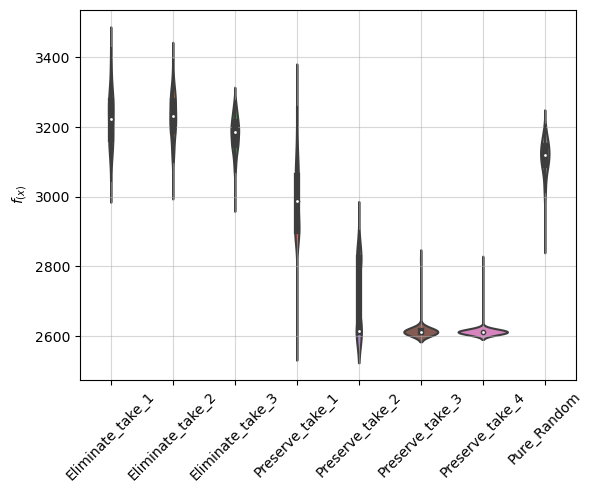

F27


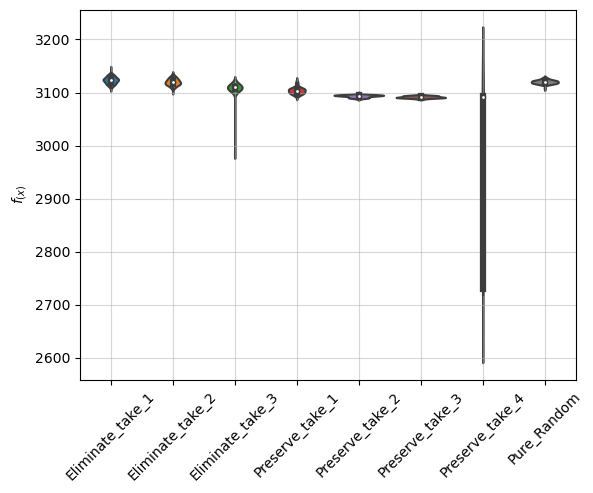

F28


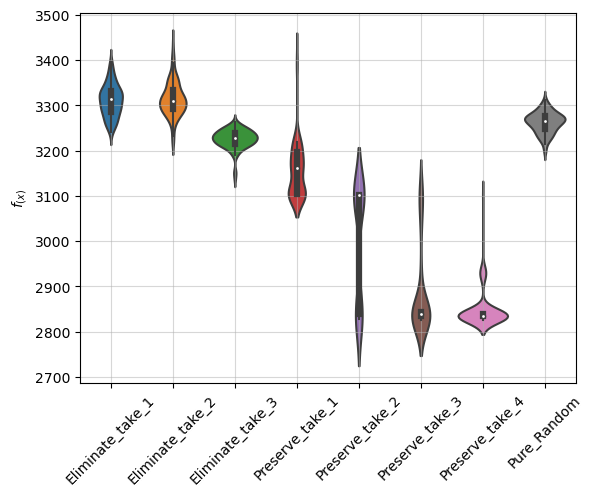

F29


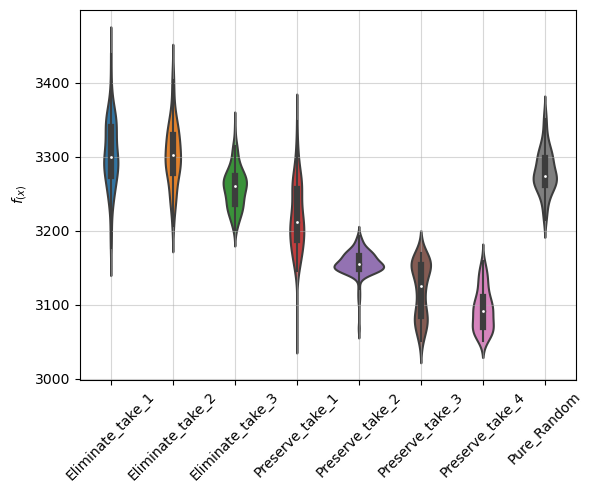

F30


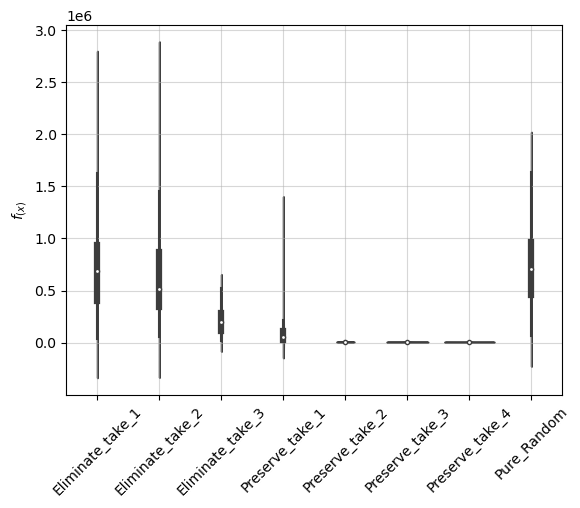

In [7]:
for f in func_num:
    print('F%d'%f)
    fig = sns.violinplot(data=eval('overall_db_f%d'%f))
    fig = plt.xticks(rotation=45)
    fig = plt.grid(alpha=.5)
    fig = plt.ylabel(r'$f_{(x)}$')
    folder_name = '/0Summary result/Plots/NC/Violin plot/'
    file_name = 'f%d_violinplot.png'%(f)
    output_dir = Path(root_directory+folder_name)
    output_dir.mkdir(parents=True, exist_ok=True)
    fig = plt.savefig(output_dir / file_name)
    fig = plt.show()

##### C

F1


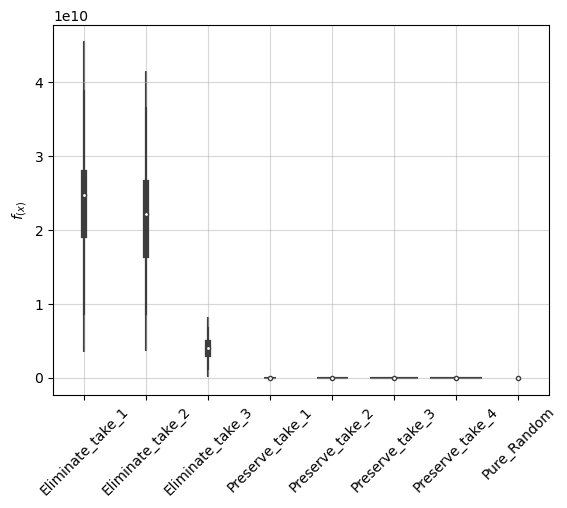

F2


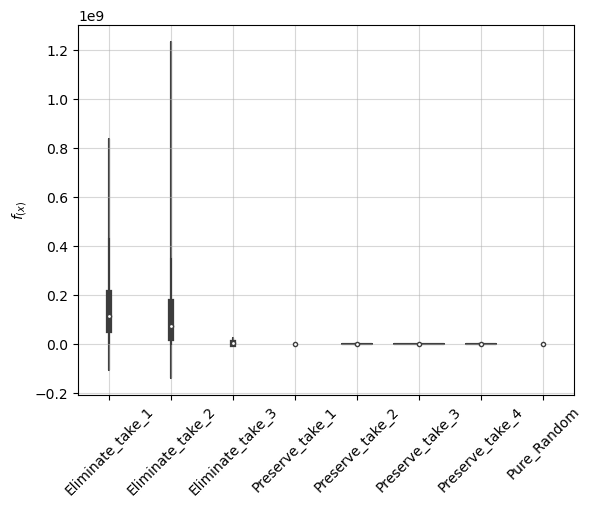

F4


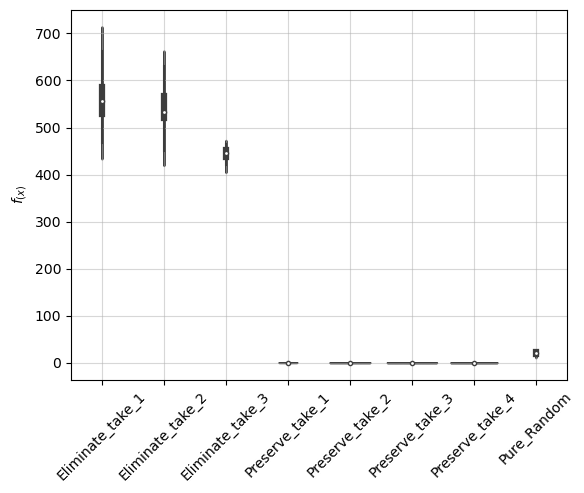

F6


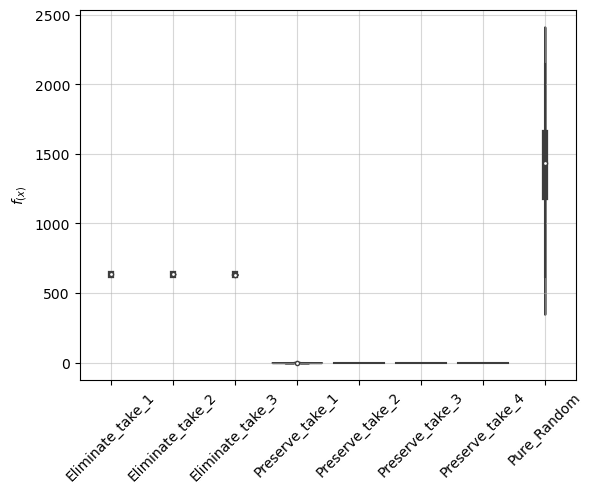

F7


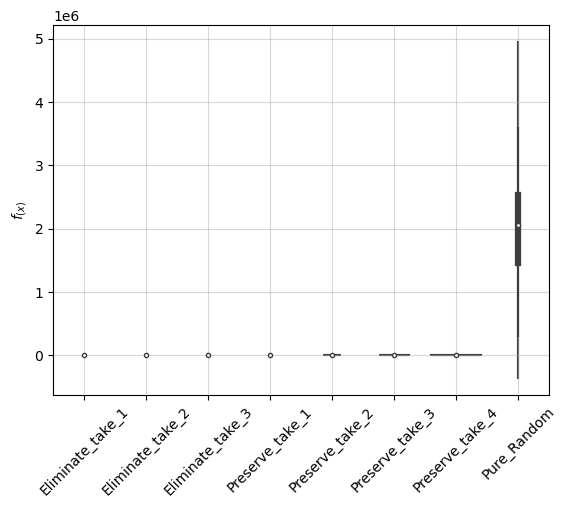

In [6]:
for f in func_num:
    print('F%d'%f)
    fig = sns.violinplot(data=eval('overall_db_f%d'%f))
    fig = plt.xticks(rotation=45)
    fig = plt.grid(alpha=.5)
    fig = plt.ylabel(r'$f_{(x)}$')
    folder_name = '/0Summary result/Plots/C/Violin plot/'
    file_name = 'f%d_violinplot.png'%(f)
    output_dir = Path(root_directory+folder_name)
    output_dir.mkdir(parents=True, exist_ok=True)
    fig = plt.savefig(output_dir / file_name)
    fig = plt.show()

<div class='alert alert-warning'>
    Box Plot
</div>

##### NC

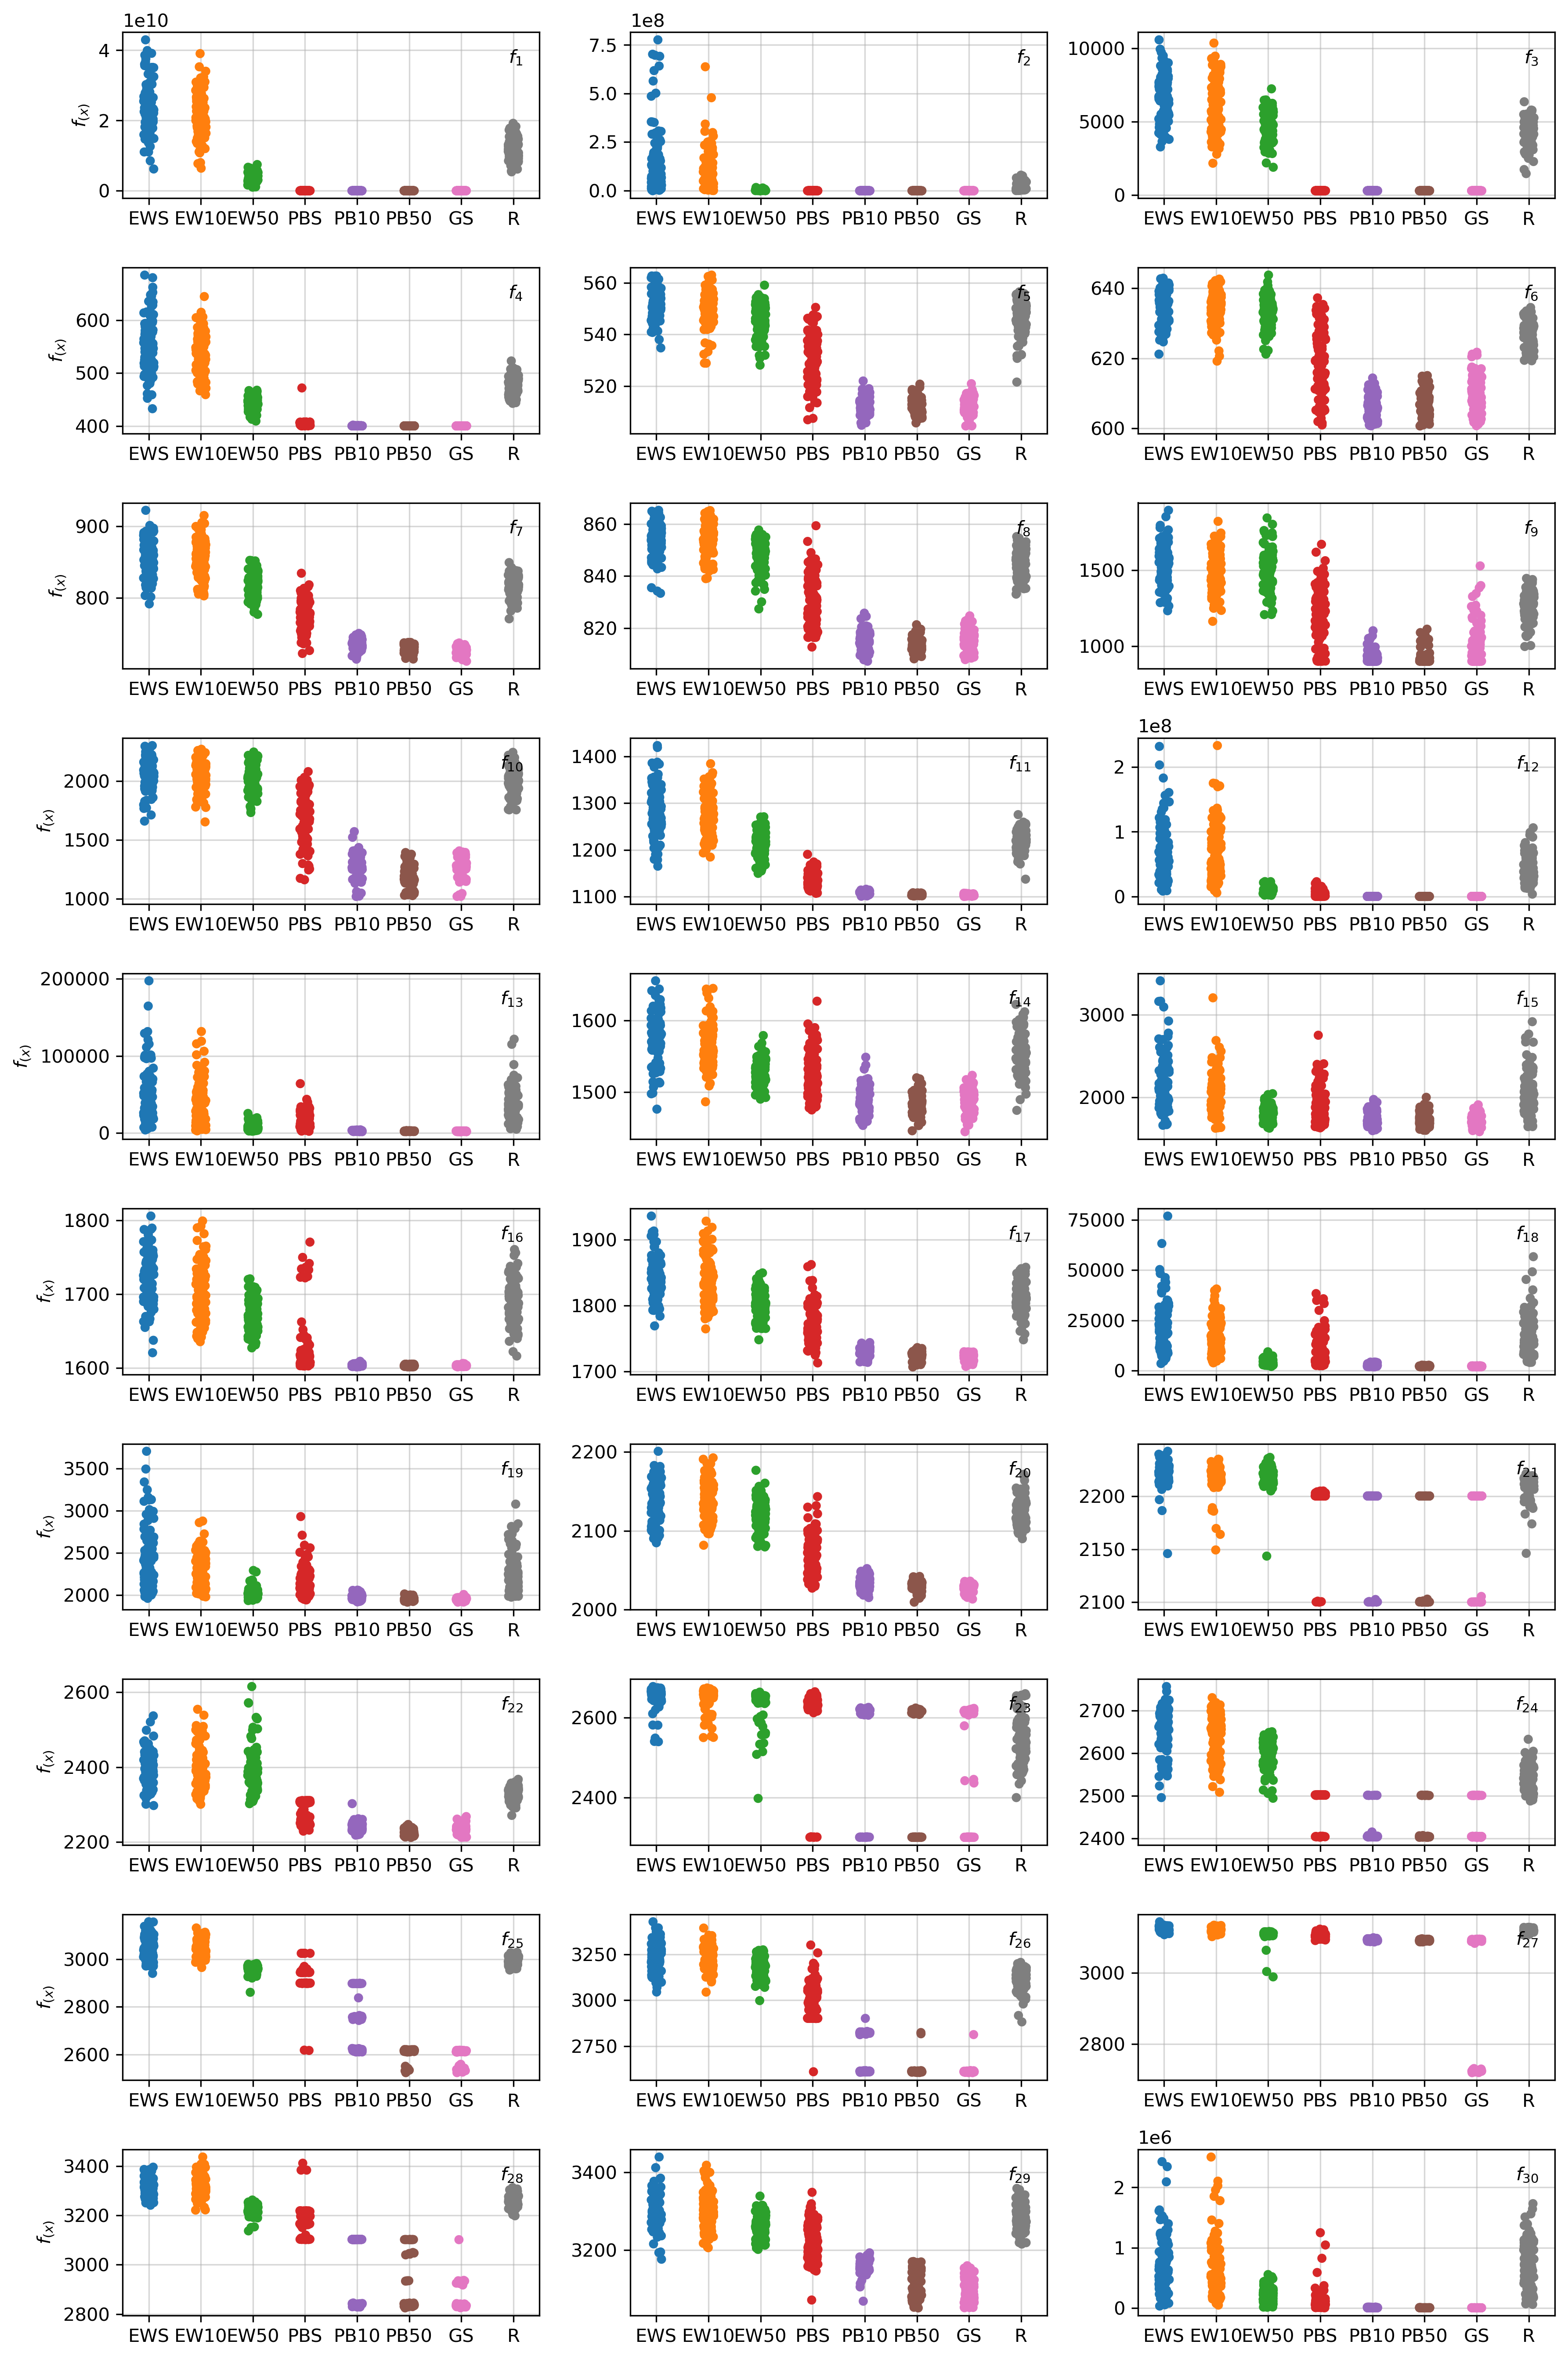

In [21]:
x_names = ['EWS', 'EW10', 'EW50', 'PBS', 'PB10', 'PB50', 'GS', 'R']
fig = plt.figure(figsize=(12, 18), dpi=300)
for i, f in enumerate(func_num):
    plt.subplot(10, 3, i+1)
    fig = sns.stripplot(data=eval('overall_db_f%d'%f))#sns.violinplot(data=eval('overall_db_f%d'%f))
    a = fig.get_xticks()
    fig = plt.xticks(ticks=a, labels=x_names)
    fig = plt.grid(alpha=.5)
    if i%3==0:
        fig = plt.ylabel(r'$f_{(x)}$')
    fig = plt.legend([r'$f_{%d}$'%(i+1)], markerscale=0, frameon=False, loc='upper right')
fig = plt.tight_layout()
folder_name = '/0Summary result/Plots/NC/Strip plots'
file_name = 'Overall_stripplot.png'
output_dir = Path(root_directory+folder_name)
output_dir.mkdir(parents=True, exist_ok=True)
fig = plt.savefig(output_dir / file_name)

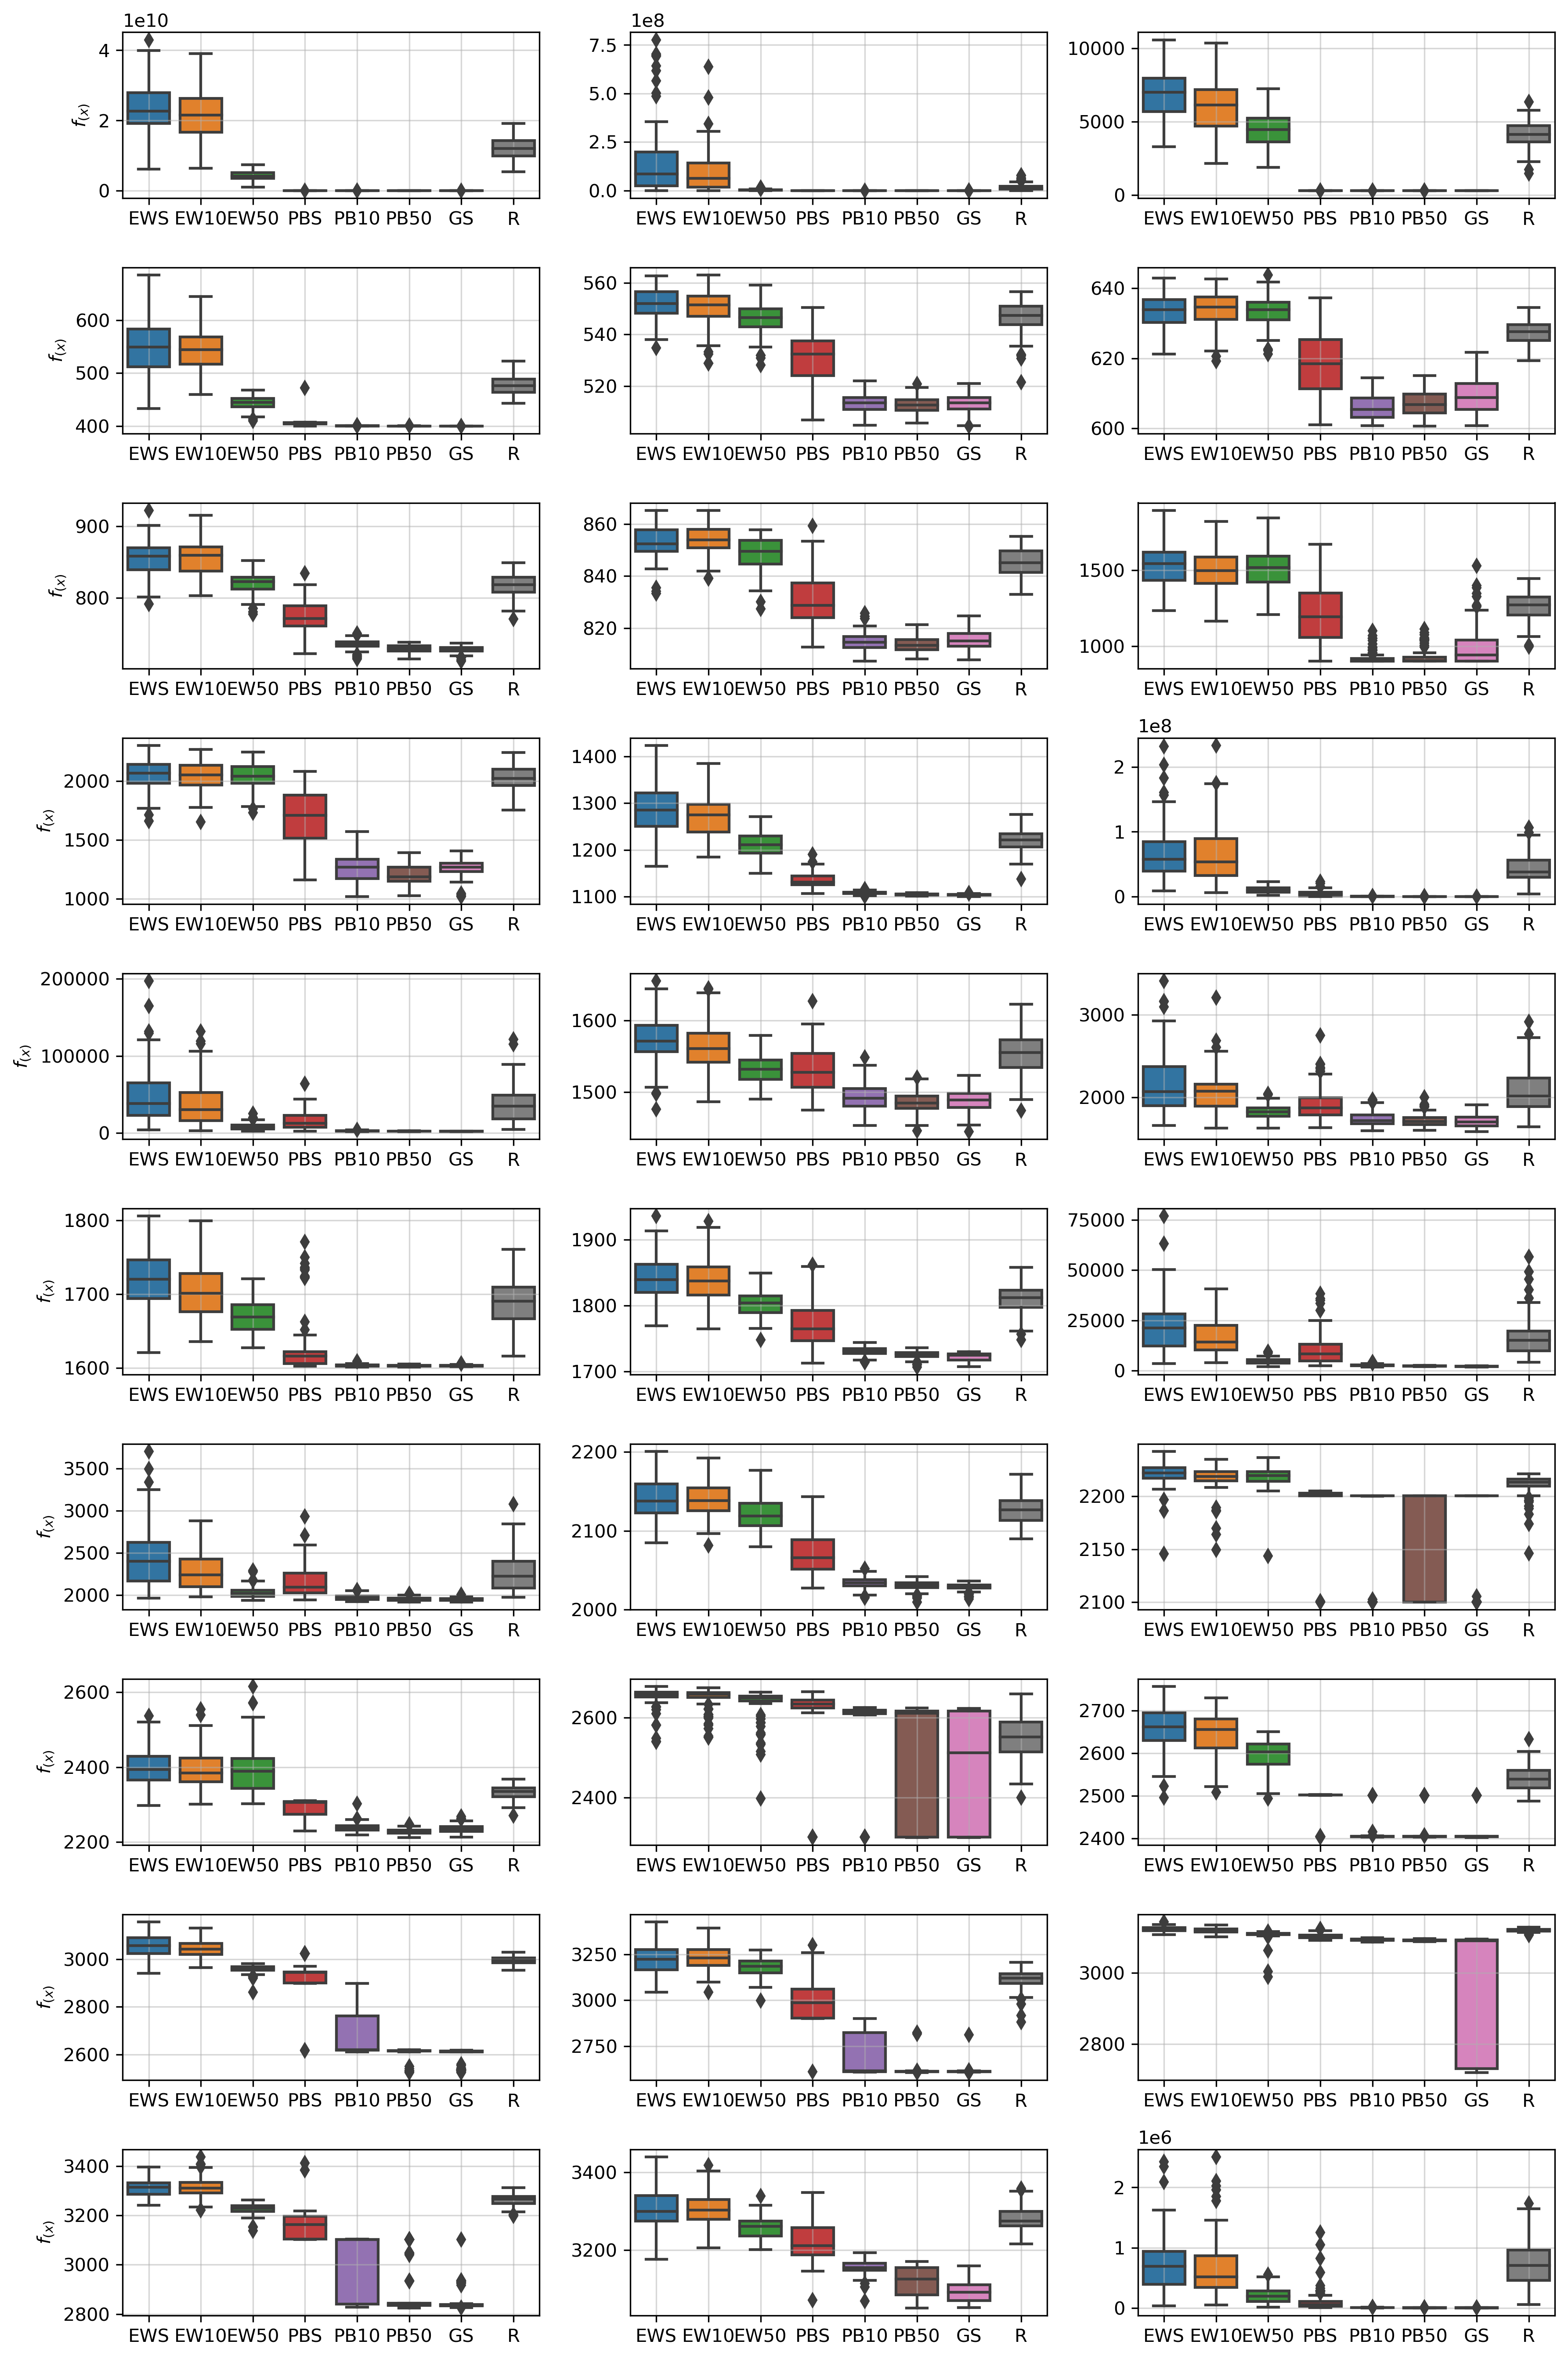

In [27]:
x_names = ['EWS', 'EW10', 'EW50', 'PBS', 'PB10', 'PB50', 'GS', 'R']
fig = plt.figure(figsize=(12, 18), dpi=300)
for i, f in enumerate(func_num):
    plt.subplot(10, 3, i+1)
    fig = sns.boxplot(data=eval('overall_db_f%d'%f))#sns.violinplot(data=eval('overall_db_f%d'%f))
    a = fig.get_xticks()
    fig = plt.xticks(ticks=a, labels=x_names)
    fig = plt.grid(alpha=.5)
    if i%3==0:
        fig = plt.ylabel(r'$f_{(x)}$')
fig = plt.tight_layout()
folder_name = '/0Summary result/Plots/NC/Box plots'
file_name = 'Overall_boxplot.png'
output_dir = Path(root_directory+folder_name)
output_dir.mkdir(parents=True, exist_ok=True)
fig = plt.savefig(output_dir / file_name)

F1


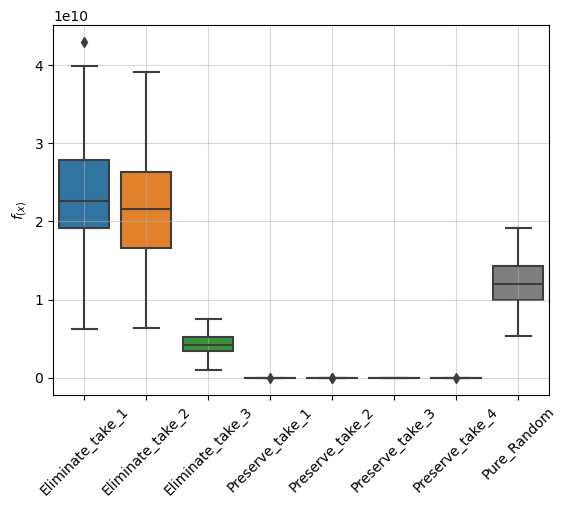

F2


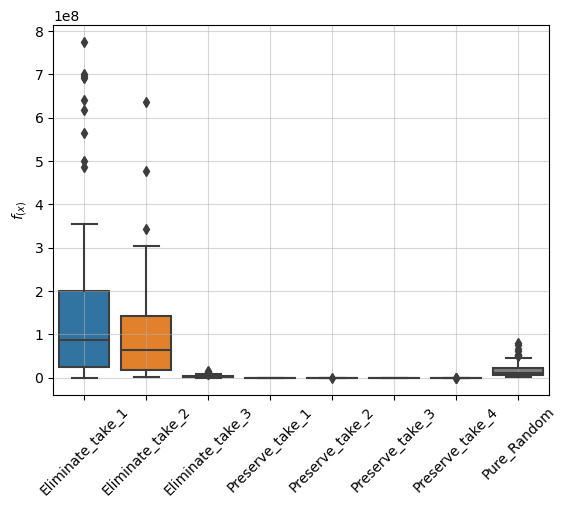

F3


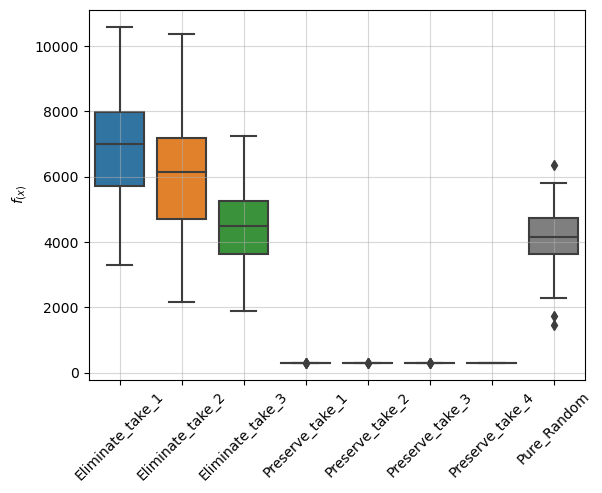

F4


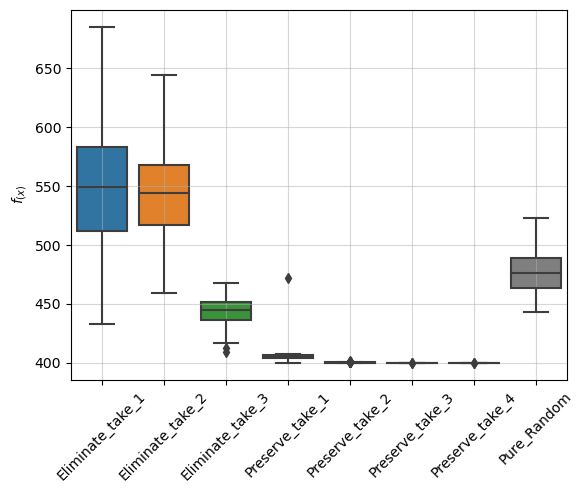

F5


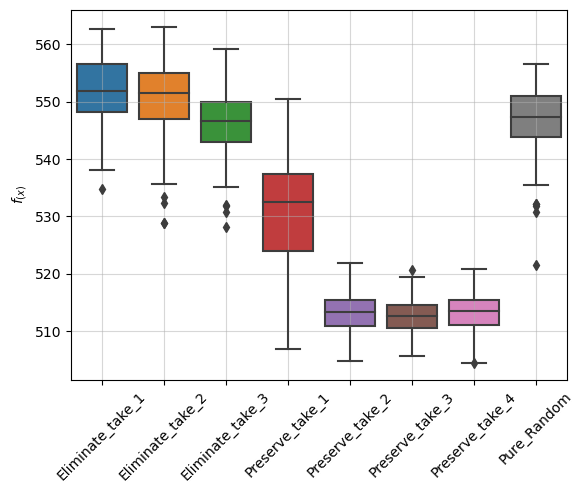

F6


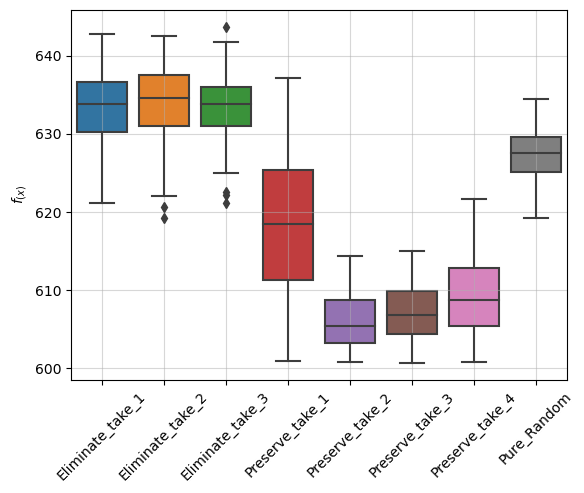

F7


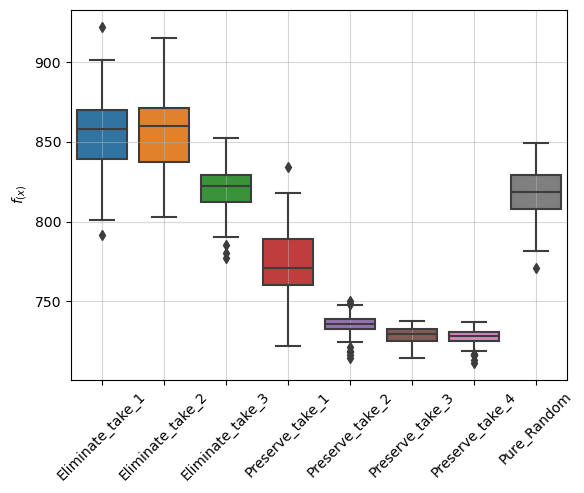

F8


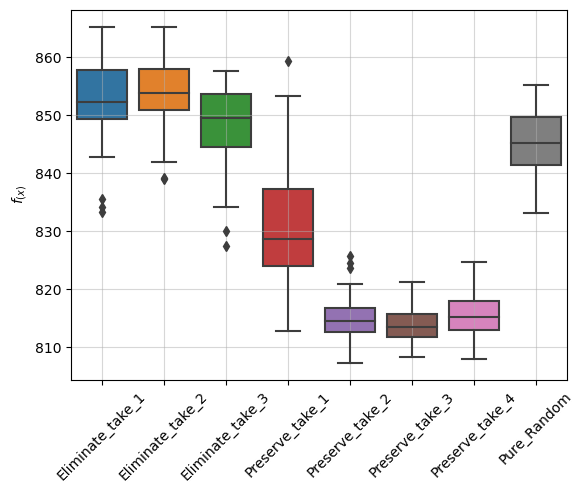

F9


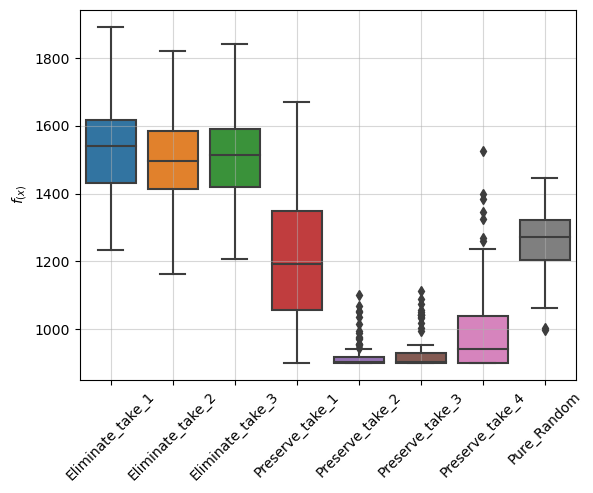

F10


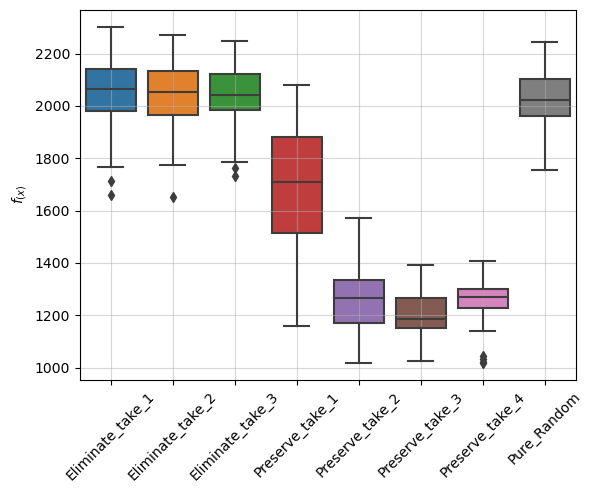

F11


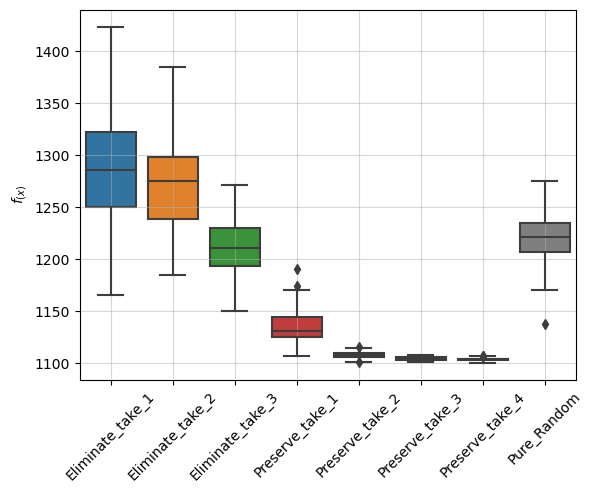

F12


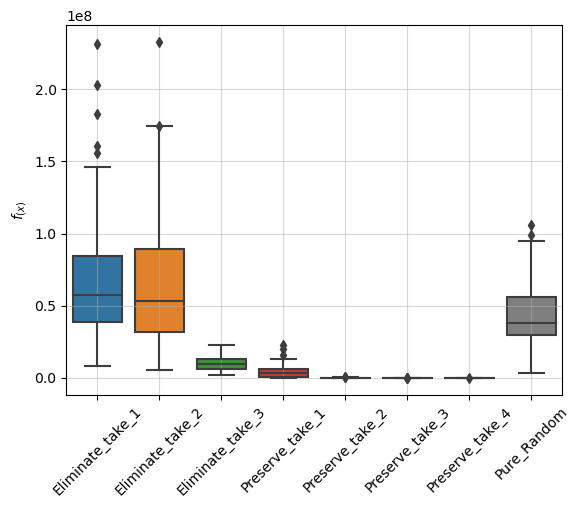

F13


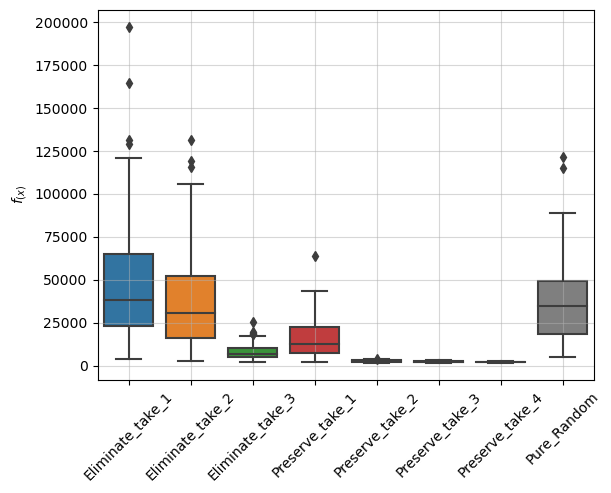

F14


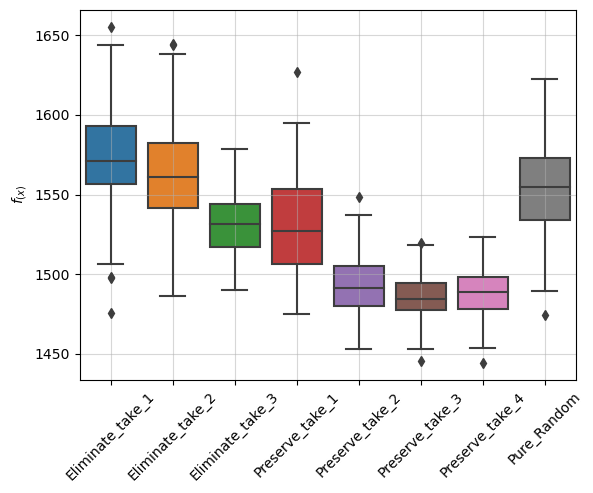

F15


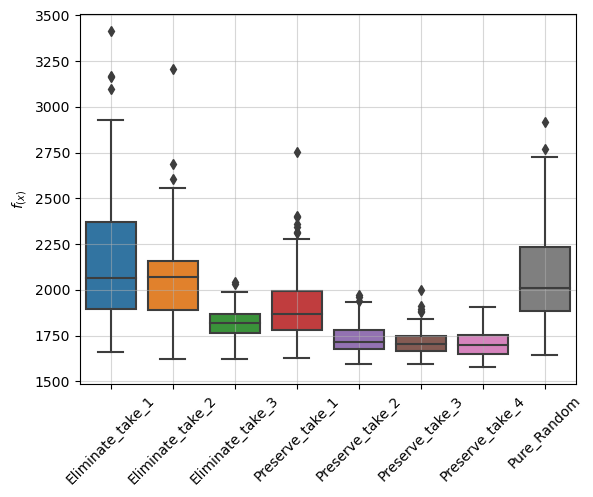

F16


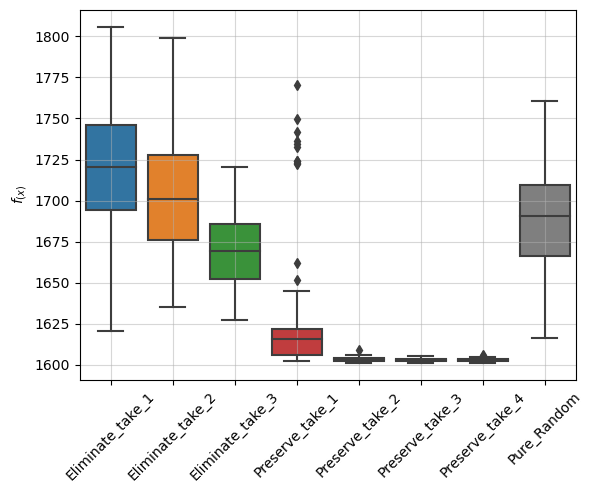

F17


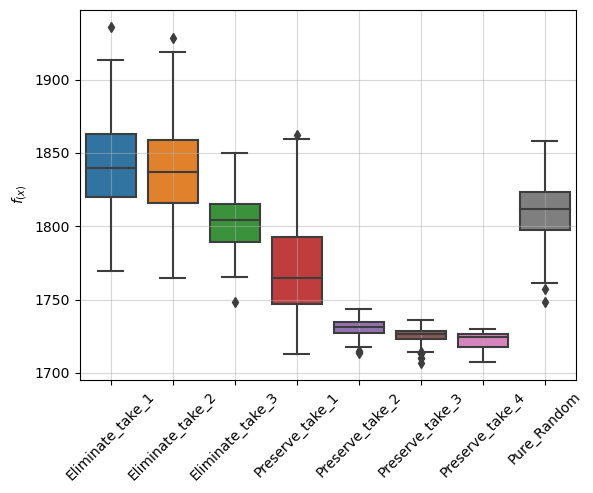

F18


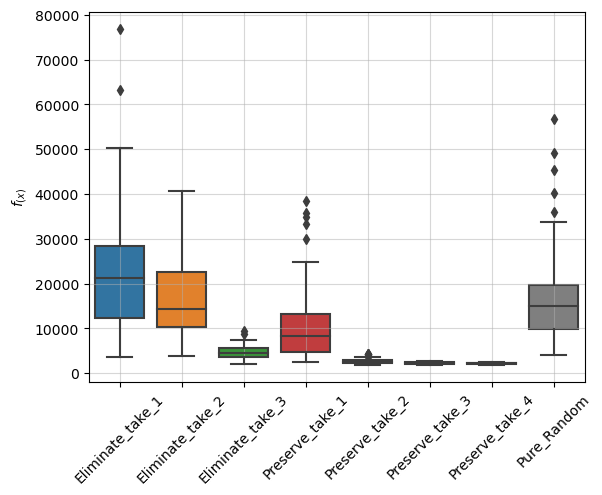

F19


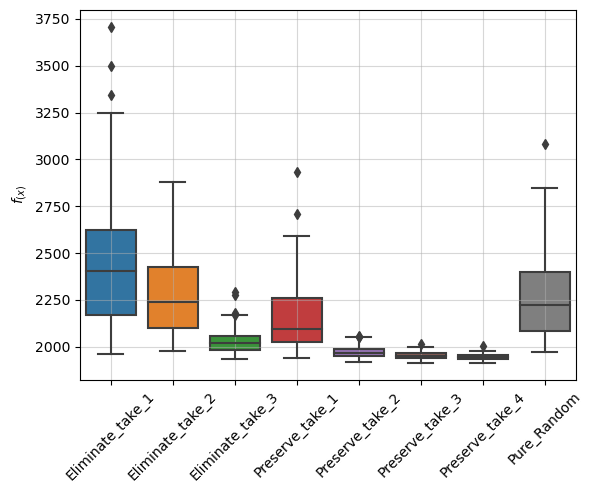

F20


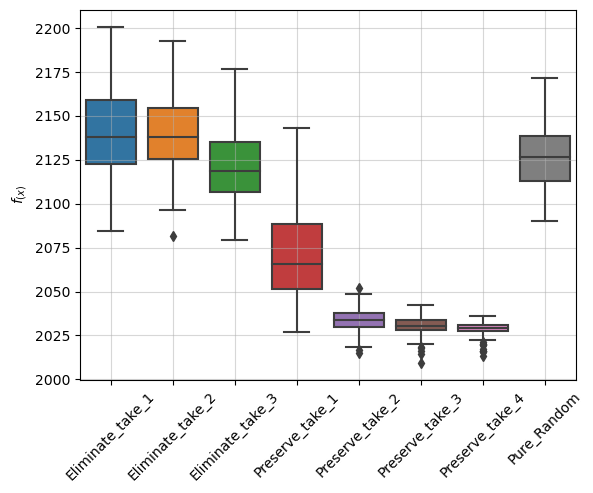

F21


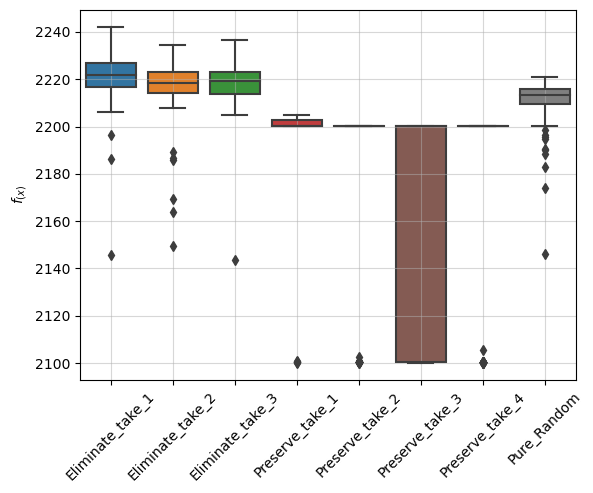

F22


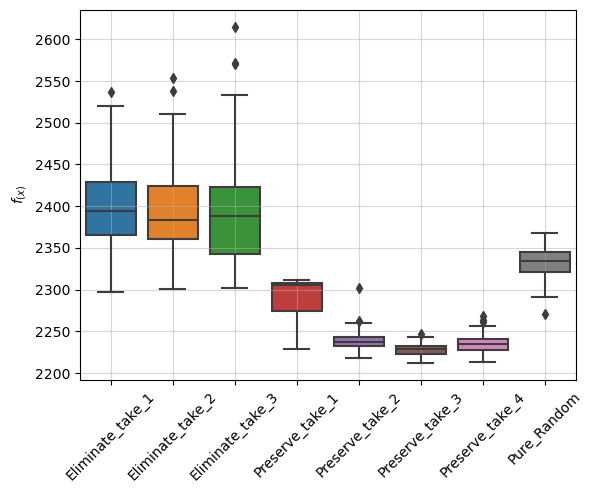

F23


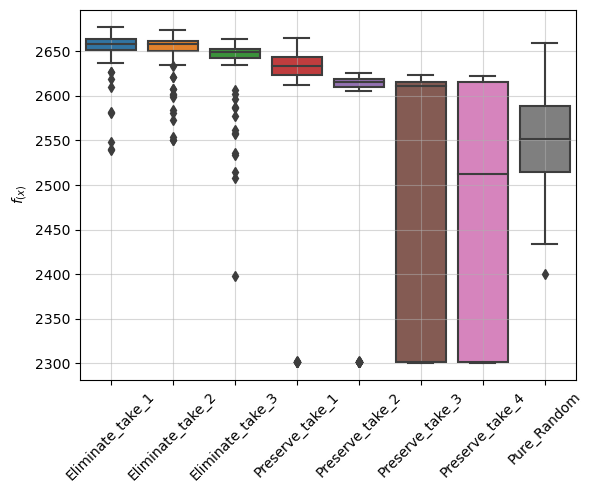

F24


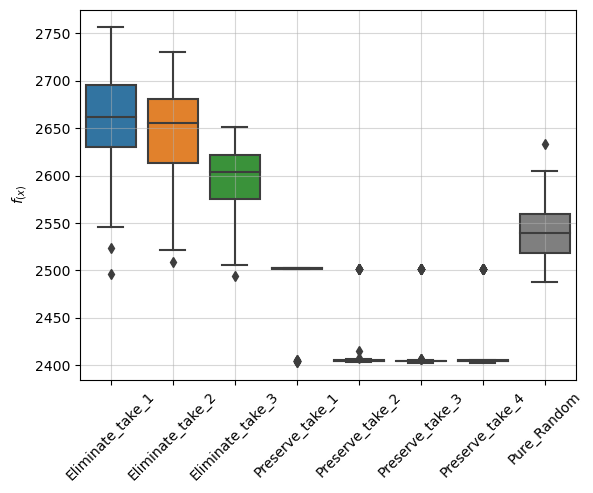

F25


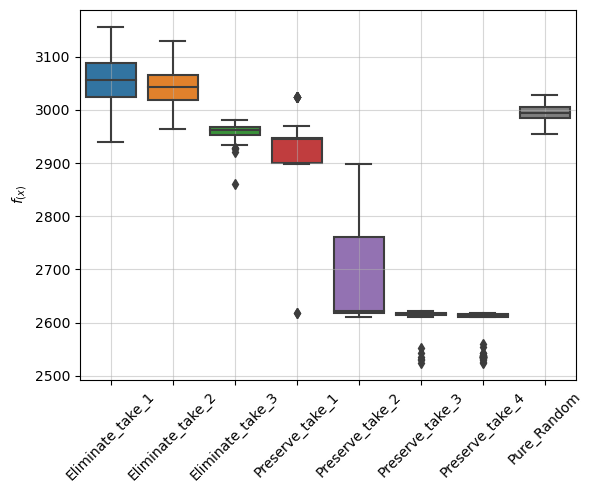

F26


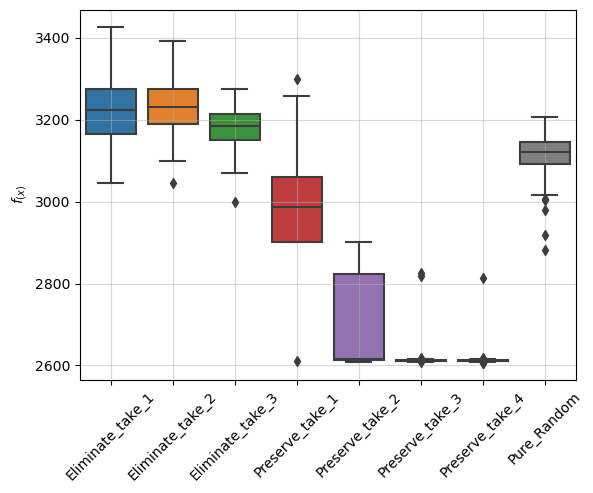

F27


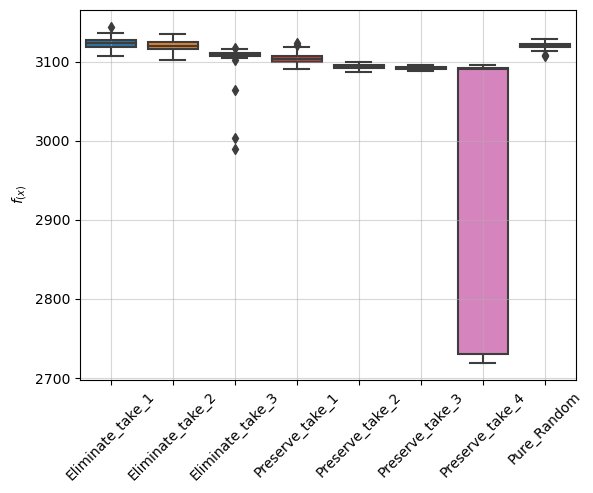

F28


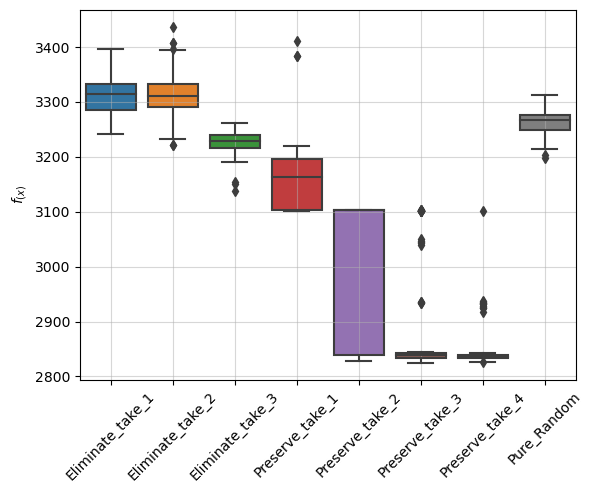

F29


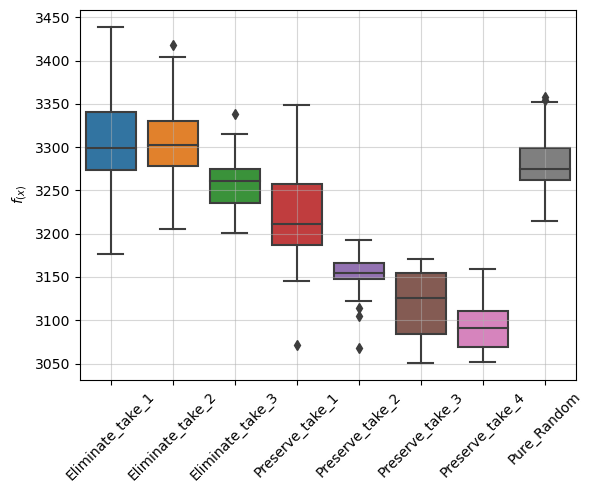

F30


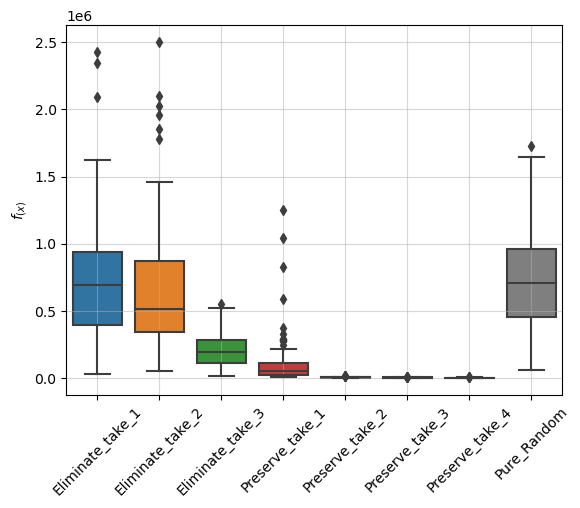

In [8]:
for f in func_num:
    print('F%d'%f)
    fig = sns.boxplot(data=eval('overall_db_f%d'%f))
    fig = plt.xticks(rotation=45)
    fig = plt.grid(alpha=.5)
    fig = plt.ylabel(r'$f_{(x)}$')
    folder_name = '/0Summary result/Plots/NC/Box Plots/'
    file_name = 'f%d_boxplot.png'%(f)
    output_dir = Path(root_directory+folder_name)
    output_dir.mkdir(parents=True, exist_ok=True)
    fig = plt.savefig(output_dir / file_name)
    fig = plt.show()

##### C

F1


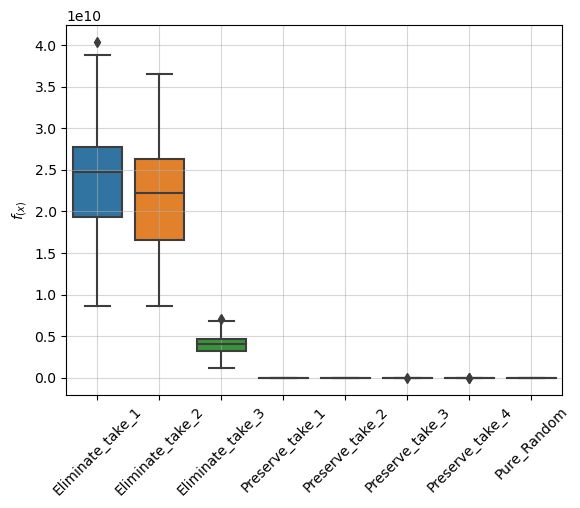

F2


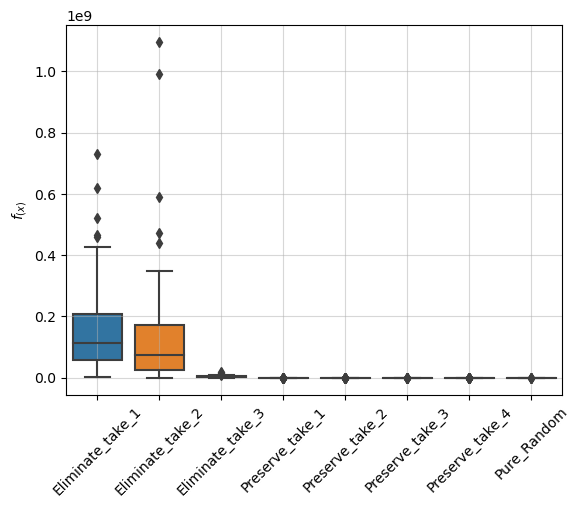

F4


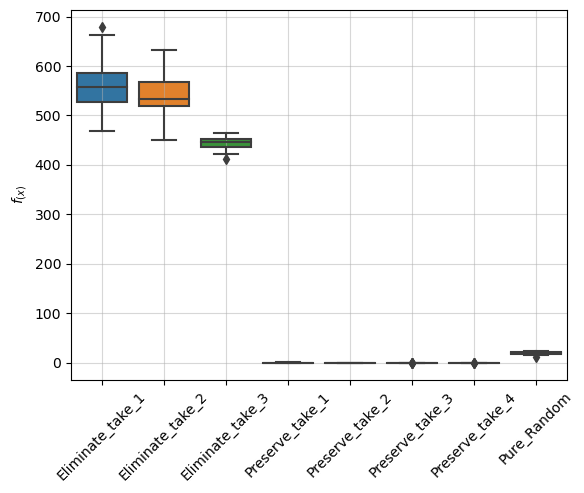

F6


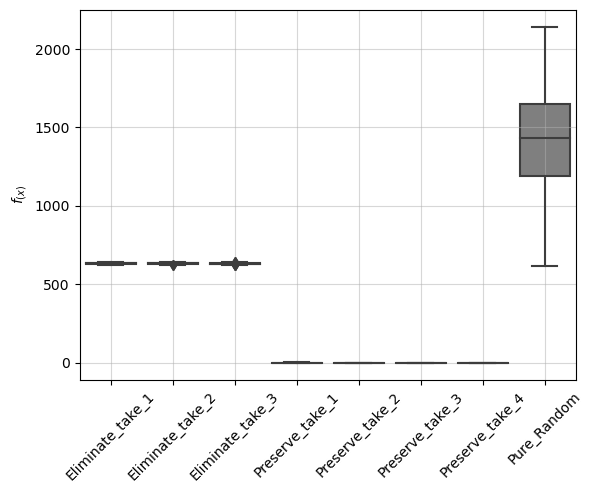

F7


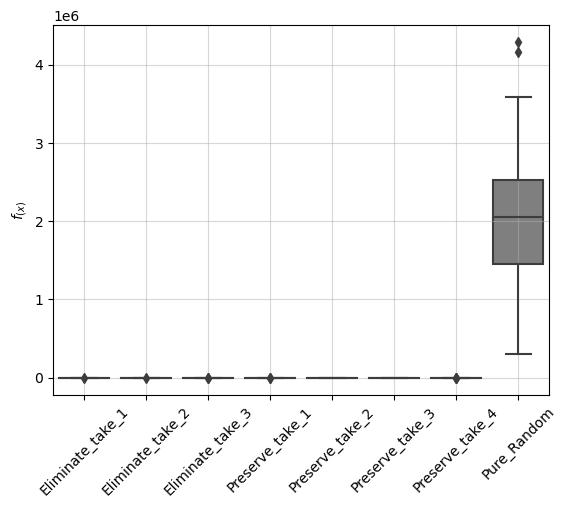

In [7]:
for f in func_num:
    print('F%d'%f)
    fig = sns.boxplot(data=eval('overall_db_f%d'%f))
    fig = plt.xticks(rotation=45)
    fig = plt.grid(alpha=.5)
    fig = plt.ylabel(r'$f_{(x)}$')
    folder_name = '/0Summary result/Plots/C/Box Plots'
    file_name = 'f%d_boxplot.png'%(f)
    output_dir = Path(root_directory+folder_name)
    output_dir.mkdir(parents=True, exist_ok=True)
    fig = plt.savefig(output_dir / file_name)
    fig = plt.show()

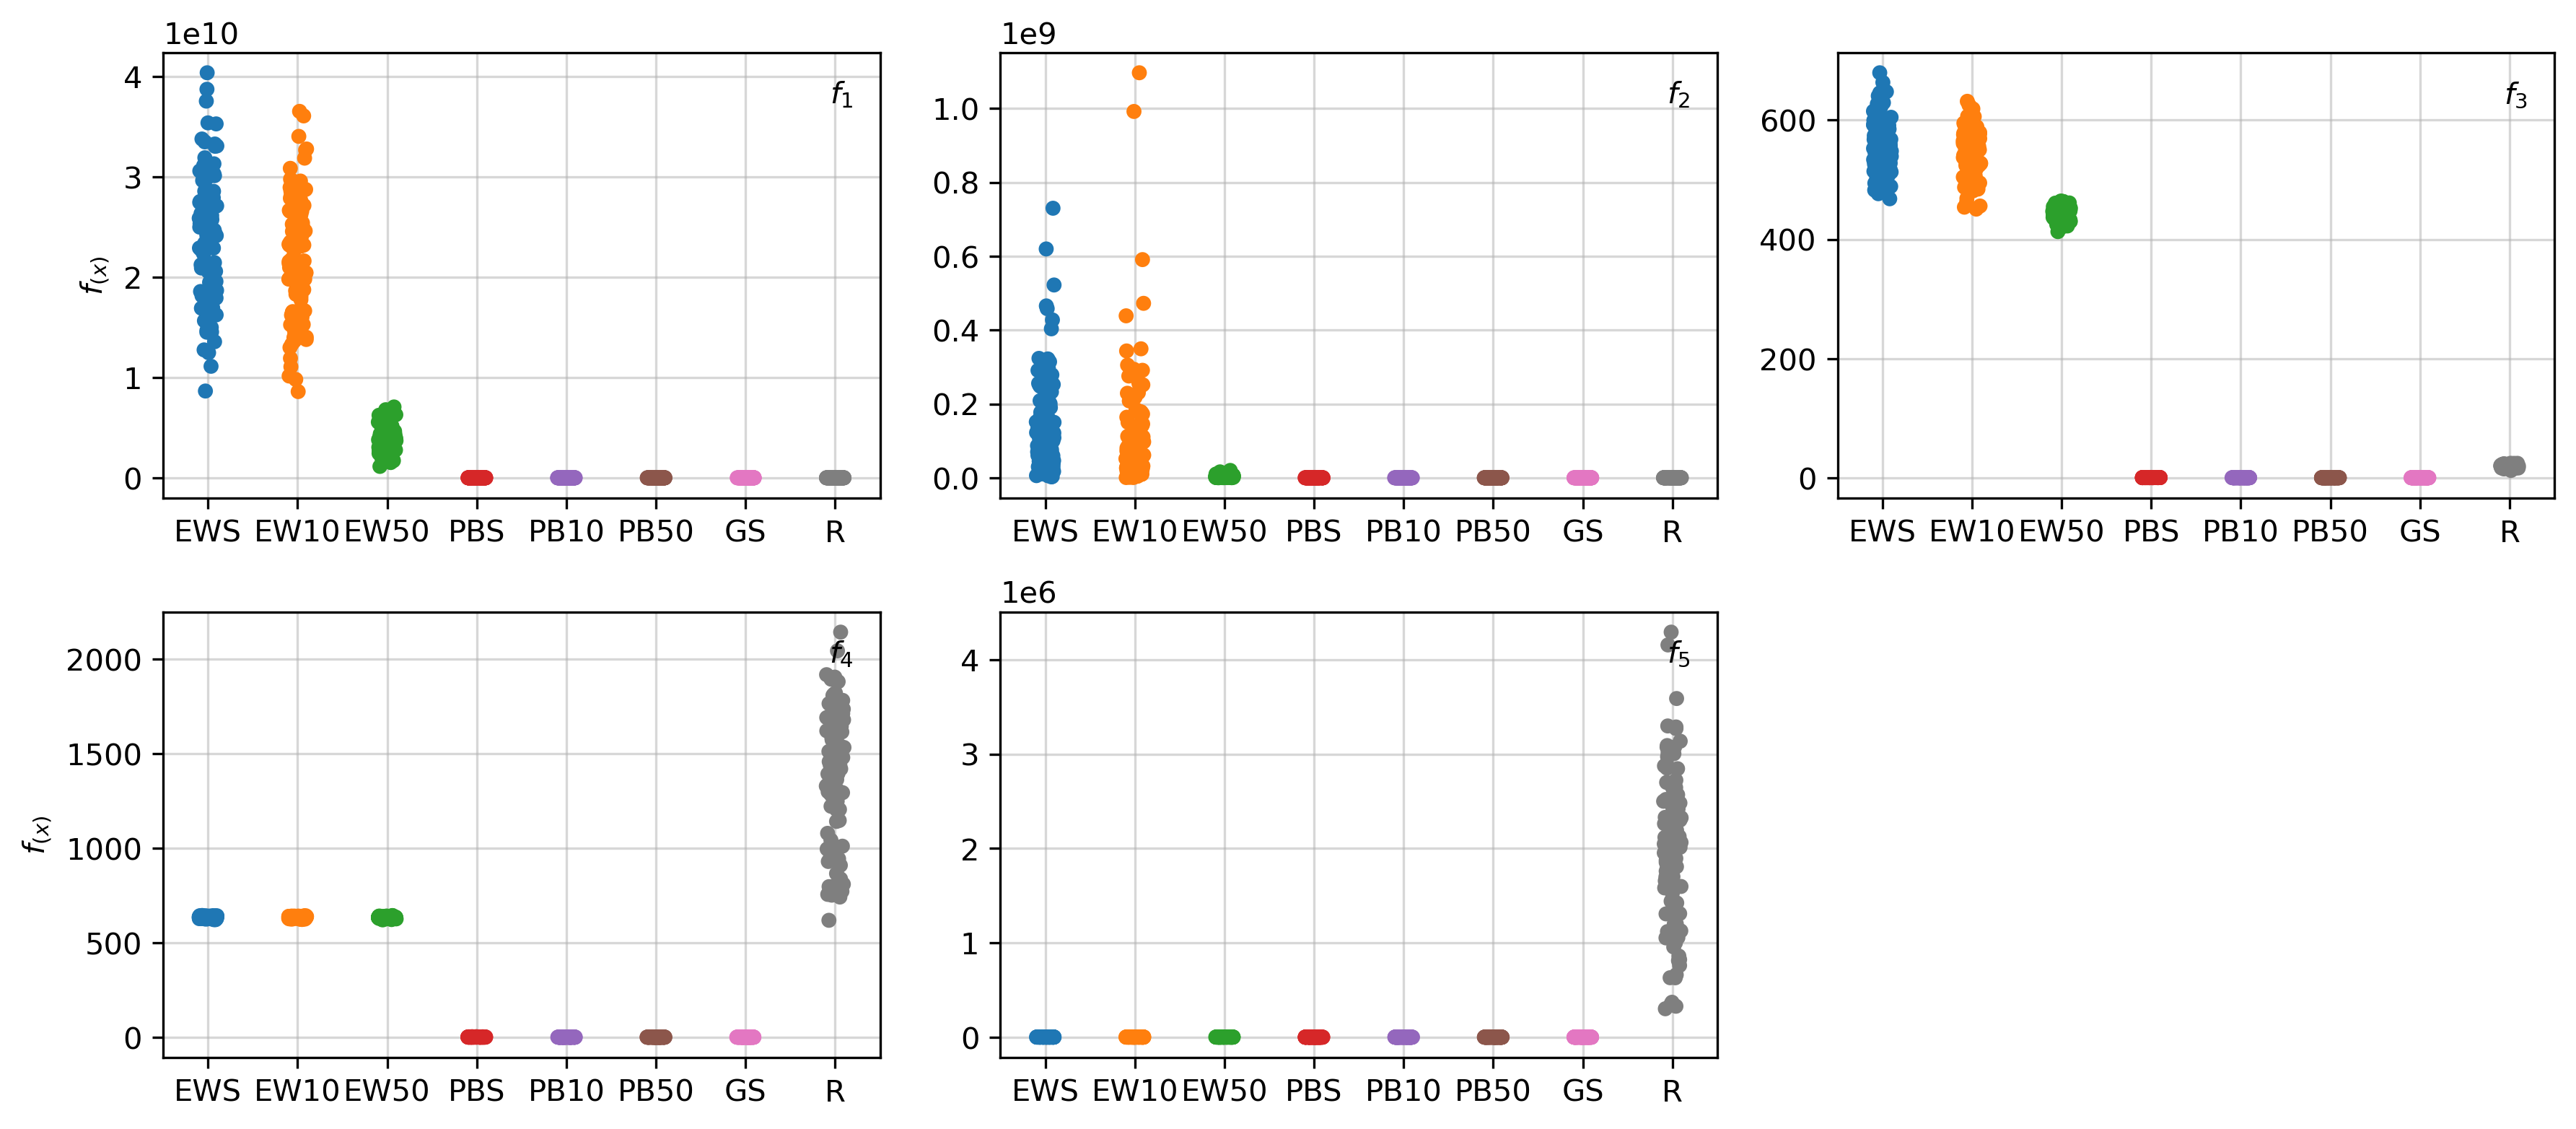

In [5]:
x_names = ['EWS', 'EW10', 'EW50', 'PBS', 'PB10', 'PB50', 'GS', 'R']
fig = plt.figure(figsize=(12, 18), dpi=300)
for i, f in enumerate(func_num):
    plt.subplot(7, 3, i+1)
    fig = sns.stripplot(data=eval('overall_db_f%d'%f))#sns.violinplot(data=eval('overall_db_f%d'%f))
    a = fig.get_xticks()
    fig = plt.xticks(ticks=a, labels=x_names)
    fig = plt.grid(alpha=.5)
    if i%3==0:
        fig = plt.ylabel(r'$f_{(x)}$')
    fig = plt.legend([r'$f_{%d}$'%(i+1)], markerscale=0, frameon=False, loc='upper right')
fig = plt.tight_layout()
folder_name = '/0Summary result/Plots/C/Strip plots'
file_name = 'Overall_stripplot.png'
output_dir = Path(root_directory+folder_name)
output_dir.mkdir(parents=True, exist_ok=True)
fig = plt.savefig(output_dir / file_name)

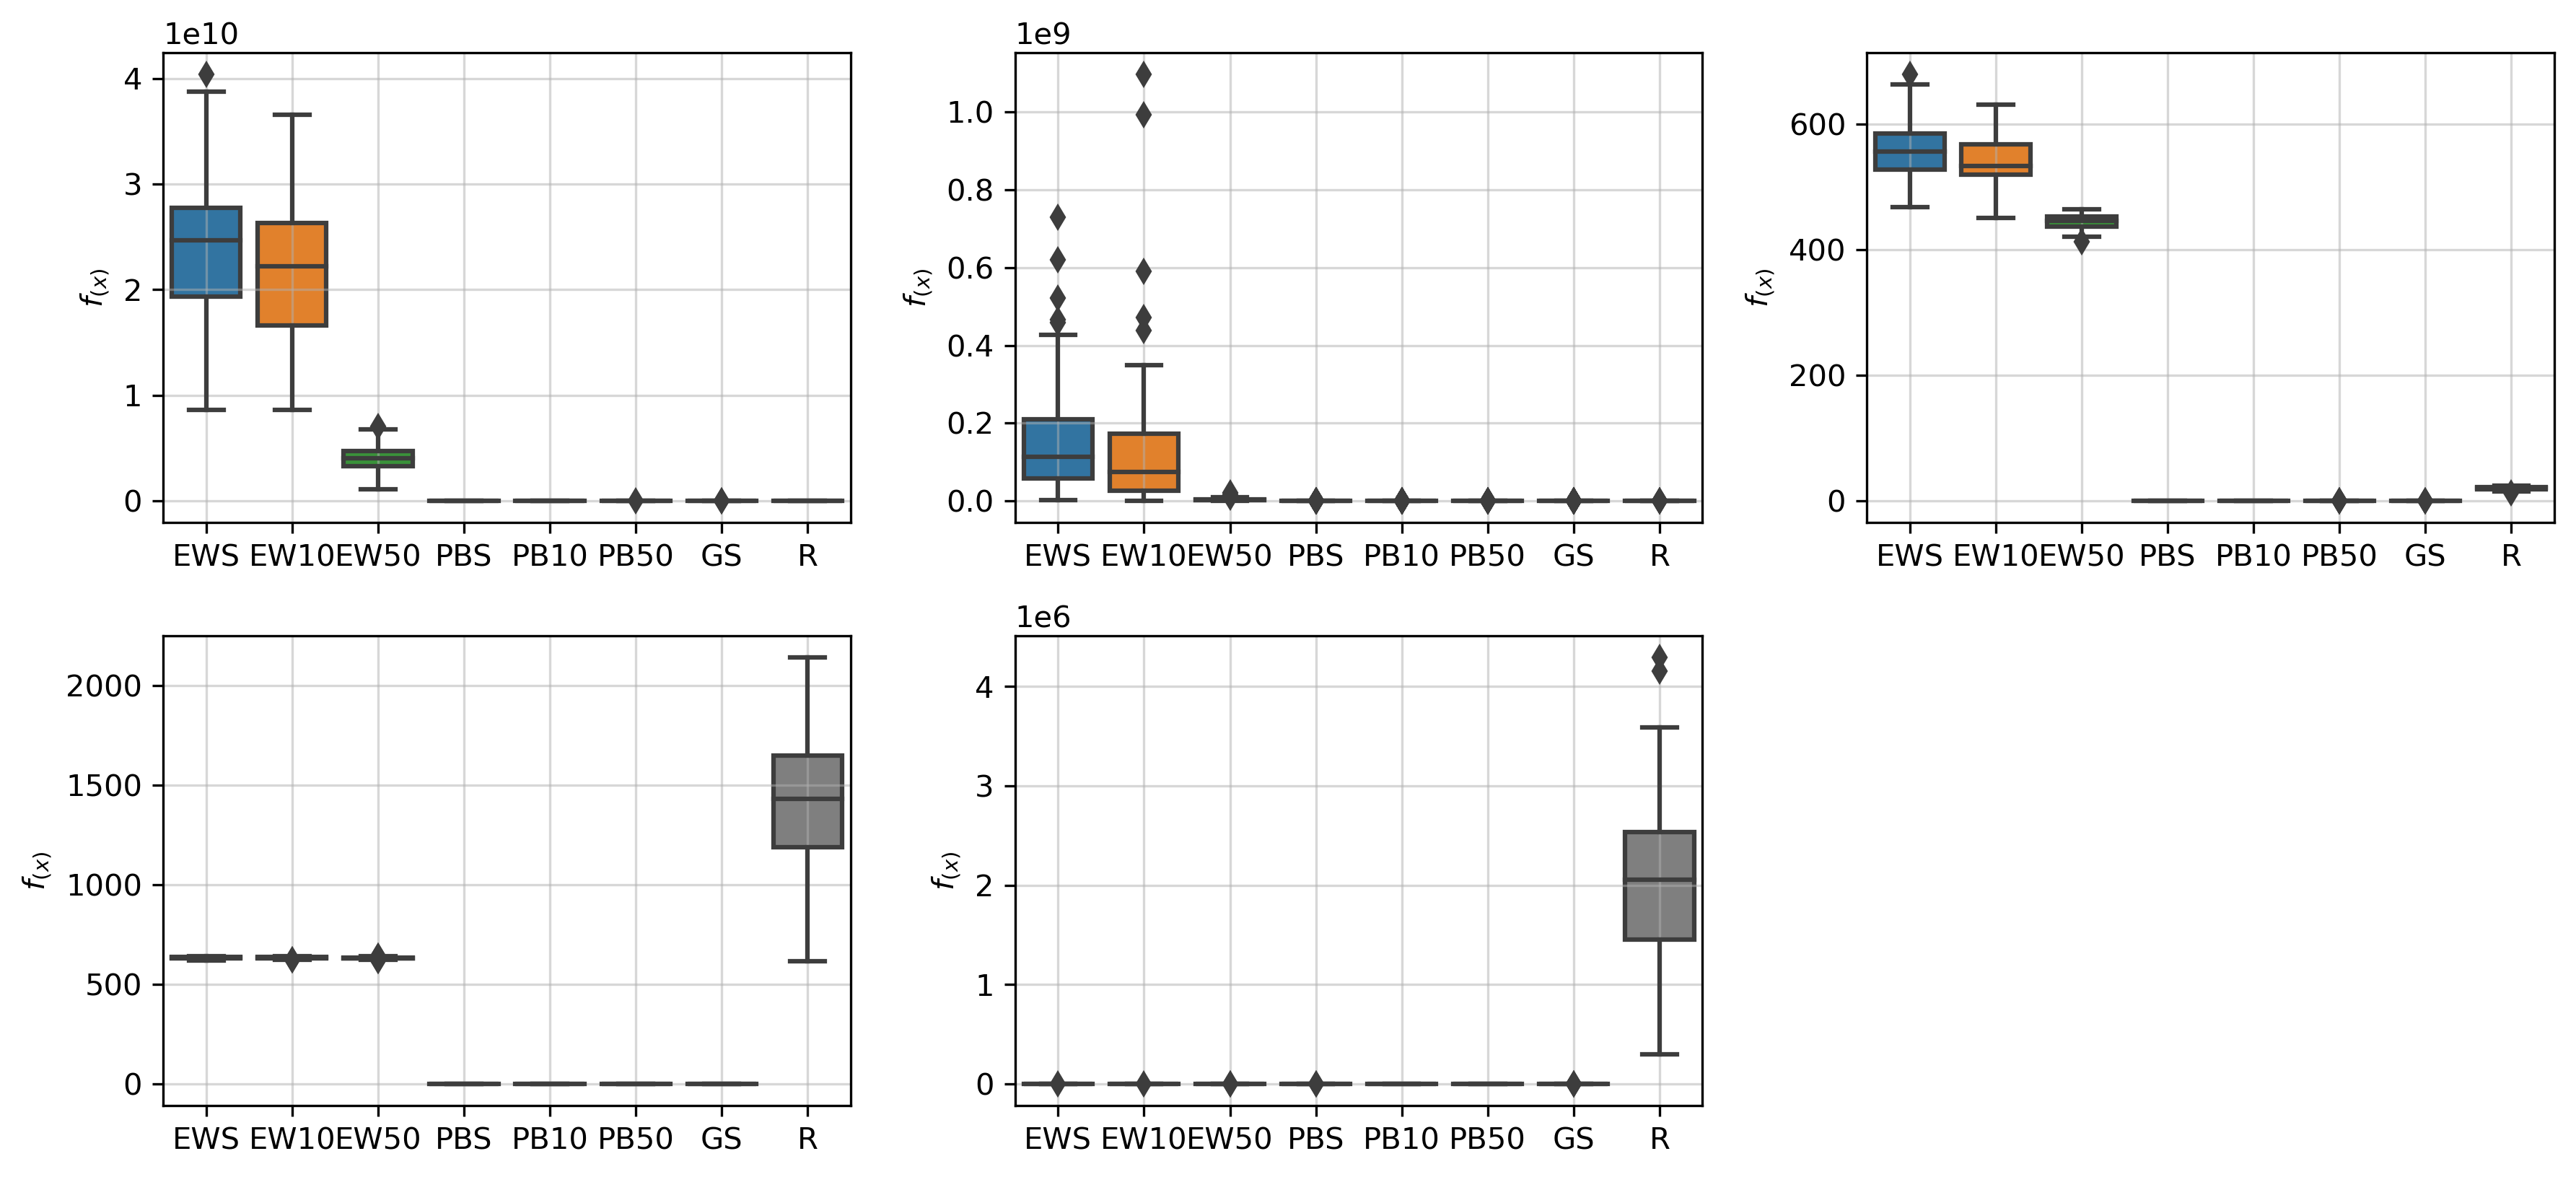

In [9]:
x_names = ['EWS', 'EW10', 'EW50', 'PBS', 'PB10', 'PB50', 'GS', 'R']
fig = plt.figure(figsize=(12, 8), dpi=300)
for i, f in enumerate(func_num):
    plt.subplot(3, 3, i+1)
    fig = sns.boxplot(data=eval('overall_db_f%d'%f))
    a = fig.get_xticks()
    fig = plt.xticks(ticks=a, labels=x_names)
    fig = plt.grid(alpha=.5)
    fig = plt.ylabel(r'$f_{(x)}$')
fig = plt.tight_layout()
folder_name = '/0Summary result/Plots/C/Box Plots'
file_name = 'Overall_boxplot.png'
output_dir = Path(root_directory+folder_name)
output_dir.mkdir(parents=True, exist_ok=True)
fig = plt.savefig(output_dir / file_name)

<div class="alert alert-success">
    <b>Type A: With a Target Algorithm</b>
</div>

This is in case you have a target algorithm and you want to compare all the results to that target

In [ ]:
target = alg_list[0]
confidence_level = .05

headers = eval('overall_db_f%d.columns'%f)
rest_name = [i for i in headers if i != target]
exec('%s_wilcox = pd.DataFrame(columns=rest_name)'%target)
for f in func_num:
    results = list()
    target_val = eval('overall_db_f%d[target]'%f)
    for alg in rest_name:
        diff = target_val - eval('overall_db_f%d["%s"]'%(f, alg))
        w, p = wilcoxon(diff, zero_method="zsplit",  method='approx')
        if not (p<confidence_level):
            symbol = '0'
        else:
            w, p = wilcoxon(diff, zero_method="zsplit", alternative='less',  method='approx')
            if p<confidence_level:
                symbol = '-'
            else:
                symbol = '+'
        results.append(symbol)  
    exec('%s_wilcox=pd.concat((%s_wilcox, pd.DataFrame(results, index=rest_name).transpose()), ignore_index=True)'
         %(target, target))
index = ['f%d'%i for i in func_num]
eval("%s_wilcox.insert(0,'Function',index)"%target)
folder_name = '/0Summary result/Stat tests/Wilcox/'
output_dir = Path(root_directory+folder_name)
output_dir.mkdir(parents=True, exist_ok=True)
file_name = '%s_wilcox.csv'%target
exec("%s_wilcox.to_csv(output_dir / file_name)"%(target))

In [ ]:
eval('%s_wilcox'%target)

<div class="alert alert-warning">
    <b>Analysis</b>
</div>

In [ ]:
database = eval('%s_wilcox'%target)
wilcox_analysis = pd.DataFrame(columns=['Function', '+', '0', '-'])
index = database.columns
for i in range(len(database)):
    plus_set = list(index[database.iloc[i]=='+'])
    zero_set = list(index[database.iloc[i]=='0'])
    minus_set = list(index[database.iloc[i]=='-'])
    temp_series = pd .DataFrame((database['Function'][i],plus_set,zero_set,minus_set),
                               index=['Function', '+', '0', '-']).transpose()
    wilcox_analysis = pd.concat((wilcox_analysis,temp_series) , axis=0, ignore_index=True)
wilcox_analysis  

In [ ]:
database = wilcox_analysis
comparison_list = list(eval('%s_wilcox.columns[1:]'%target))
print('INFORMATION','..'*20)
print('Target Algorithm:\t\t%s'%target)
print('Comparison list:\t%s'%comparison_list)
print('..'*26)
print('\n')
for i in range(len(wilcox_analysis)):
    func_name = database['Function'][i]
    minus_set = database['-'][i]
    plus_set = database['+'][i]
    zero_set = database['0'][i]
    print('=='*33)
    print('\t\t\t\t:%s:'%func_name)
    print('=='*33)
    if len(minus_set)>0:
        print(f'''* %s was better than %d algorithms,
        these were: %s'''%(target, len(minus_set), minus_set))
    else:
        print('* %s was not able to outperfome any algorithm for this function.'%target)
    if len(plus_set)>0:
        print(f'''* %s was outperfomed by %d algorithms,
        these were: %s'''%(target, len(plus_set), plus_set))
    else:
        print('* %s was not outperformed by any algorithm for this function.'%target)
    if len(zero_set)>0:
        print(f'''* the performance of %d algorithm were statiscally simillar to %s,
        these were: %s'''%(len(zero_set), target, zero_set))
    print('=='*33)

#### Type B: Comparison

##### NC

In [9]:
confidence_level = .05

for target in alg_list:
    headers = eval('overall_db_f%d.columns'%f)
    rest_name = [i for i in headers if i !=target]
    exec('%s_wilcox = pd.DataFrame(columns=rest_name)'%target)
    for f in func_num:
        results = list()
        target_val = eval('overall_db_f%d[target]'%f)
        for alg in rest_name:
            diff = target_val - eval('overall_db_f%d["%s"]'%(f, alg))
            w, p = wilcoxon(diff, zero_method="zsplit",  method='approx')
            if not (p<confidence_level):
                symbol = '0'
            else:
                w, p = wilcoxon(diff, zero_method="zsplit", alternative='less',  method='approx')
                if p<confidence_level:
                    symbol = '-'
                else:
                    symbol = '+'
            results.append(symbol)
        exec('%s_wilcox=pd.concat((%s_wilcox, pd.DataFrame(results, index=rest_name).transpose()), ignore_index=True)'
             %(target, target))
    index = ['f%d'%i for i in func_num]
    eval("%s_wilcox.insert(0,'Function',index)"%target)
    folder_name = '/0Summary result/Stat tests/NC/Wilcox/Comparison/'
    output_dir = Path(root_directory+folder_name)
    output_dir.mkdir(parents=True, exist_ok=True)
    file_name = '%s_wilcox.csv'%target
    exec("%s_wilcox.to_csv(output_dir / file_name)"%(target))

In [11]:
#this is an example of the outputs
eval('%s_wilcox'%alg_list[-1])

Function Eliminate_take_1 Eliminate_take_2 Eliminate_take_3  \
0        f1                -                -                +   
1        f2                -                -                +   
2        f3                -                -                0   
3        f4                -                -                +   
4        f5                -                -                0   
5        f6                -                -                -   
6        f7                -                -                0   
7        f8                -                -                -   
8        f9                -                -                -   
9       f10                0                0                0   
10      f11                -                -                +   
11      f12                -                -                +   
12      f13                -                0                +   
13      f14                -                -                +   
14      f15                -                0                +   
15      f16                -                -                +   
16      f17                -                -                +   
17      f18                -                0                +   
18      f19                -                0                +   
19      f20                -                -                +   
20      f21                -                -                -   
21      f22                -                -                -   
22      f23                -                -                -   
23      f24                -                -                -   
24      f25                -                -                +   
25      f26                -                -                -   
26      f27                -                0                +   
27      f28                -                -                +   
28      f29                -                -                +   
29      f30                0                +                +   

   Preserve_take_1 Preserve_take_2 Preserve_take_3 Preserve_take_4  
0                +               +               +               +  
1                +               +               +               +  
2                +               +               +               +  
3                +               +               +               +  
4                +               +               +               +  
5                +               +               +               +  
6                +               +               +               +  
7                +               +               +               +  
8                +               +               +               +  
9                +               +               +               +  
10               +               +               +               +  
11               +               +               +               +  
12               +               +               +               +  
13               +               +               +               +  
14               +               +               +               +  
15               +               +               +               +  
16               +               +               +               +  
17               +               +               +               +  
18               +               +               +               +  
19               +               +               +               +  
20               +               +               +               +  
21               +               +               +               +  
22               -               -               +               +  
23               +               +               +               +  
24               +               +               +               +  
25               +               +               +               +  
26               +               +               +               +  
27               +      

##### C

In [8]:
confidence_level = .05

for target in alg_list:
    headers = eval('overall_db_f%d.columns'%f)
    rest_name = [i for i in headers if i !=target]
    exec('%s_wilcox = pd.DataFrame(columns=rest_name)'%target)
    for f in func_num:
        results = list()
        target_val = eval('overall_db_f%d[target]'%f)
        for alg in rest_name:
            diff = target_val - eval('overall_db_f%d["%s"]'%(f, alg))
            w, p = wilcoxon(diff, zero_method="zsplit",  method='approx')
            if not (p<confidence_level):
                symbol = '0'
            else:
                w, p = wilcoxon(diff, zero_method="zsplit", alternative='less',  method='approx')
                if p<confidence_level:
                    symbol = '-'
                else:
                    symbol = '+'
            results.append(symbol)
        exec('%s_wilcox=pd.concat((%s_wilcox, pd.DataFrame(results, index=rest_name).transpose()), ignore_index=True)'
             %(target, target))
    index = ['f%d'%i for i in func_num]
    eval("%s_wilcox.insert(0,'Function',index)"%target)
    folder_name = '/0Summary result/Stat tests/C/Wilcox/Comparison/'
    output_dir = Path(root_directory+folder_name)
    output_dir.mkdir(parents=True, exist_ok=True)
    file_name = '%s_wilcox.csv'%target
    exec("%s_wilcox.to_csv(output_dir / file_name)"%(target))

In [9]:
#this is an example of the outputs
eval('%s_wilcox'%alg_list[-1])

Function Eliminate_take_1 Eliminate_take_2 Eliminate_take_3 Preserve_take_1  \
0       f1                -                -                -               +   
1       f2                -                -                -               +   
2       f4                -                -                -               +   
3       f6                +                +                +               +   
4       f7                +                +                +               +   

  Preserve_take_2 Preserve_take_3 Preserve_take_4  
0               +               +               +  
1               +               +               +  
2               +               +               +  
3               +               +               +  
4               +               +               +

<div class="alert alert-warning">
    <b>Analysis</b>
</div>

##### NC

In [12]:
for target in headers:
    database = eval('%s_wilcox'%target)
    exec("%s_wilcox_analysis = pd.DataFrame(columns=['Function', '+', '0', '-'])"%target)
    index = database.columns
    for i in range(len(database)):
        plus_set = list(index[database.iloc[i]=='+'])
        zero_set = list(index[database.iloc[i]=='0'])
        minus_set = list(index[database.iloc[i]=='-'])
        temp_series = pd .DataFrame((database['Function'][i],plus_set,zero_set,minus_set),
                                   index=['Function', '+', '0', '-']).transpose()
        
        exec("%s_wilcox_analysis = pd.concat((%s_wilcox_analysis,temp_series) , axis=0, ignore_index=True)"%(target,target))

In [13]:
#this is an example of the result
eval('%s_wilcox_analysis'%alg_list[-1])

Function                                                  +  \
0        f1  [Eliminate_take_3, Preserve_take_1, Preserve_t...   
1        f2  [Eliminate_take_3, Preserve_take_1, Preserve_t...   
2        f3  [Preserve_take_1, Preserve_take_2, Preserve_ta...   
3        f4  [Eliminate_take_3, Preserve_take_1, Preserve_t...   
4        f5  [Preserve_take_1, Preserve_take_2, Preserve_ta...   
5        f6  [Preserve_take_1, Preserve_take_2, Preserve_ta...   
6        f7  [Preserve_take_1, Preserve_take_2, Preserve_ta...   
7        f8  [Preserve_take_1, Preserve_take_2, Preserve_ta...   
8        f9  [Preserve_take_1, Preserve_take_2, Preserve_ta...   
9       f10  [Preserve_take_1, Preserve_take_2, Preserve_ta...   
10      f11  [Eliminate_take_3, Preserve_take_1, Preserve_t...   
11      f12  [Eliminate_take_3, Preserve_take_1, Preserve_t...   
12      f13  [Eliminate_take_3, Preserve_take_1, Preserve_t...   
13      f14  [Eliminate_take_3, Preserve_take_1, Preserve_t...   
14      f15  [Eliminate_take_3, Preserve_take_1, Preserve_t...   
15      f16  [Eliminate_take_3, Preserve_take_1, Preserve_t...   
16      f17  [Eliminate_take_3, Preserve_take_1, Preserve_t...   
17      f18  [Eliminate_take_3, Preserve_take_1, Preserve_t...   
18      f19  [Eliminate_take_3, Preserve_take_1, Preserve_t...   
19      f20  [Eliminate_take_3, Preserve_take_1, Preserve_t...   
20      f21  [Preserve_take_1, Preserve_take_2, Preserve_ta...   
21      f22  [Preserve_take_1, Preserve_take_2, Preserve_ta...   
22      f23                 [Preserve_take_3, Preserve_take_4]   
23      f24  [Preserve_take_1, Preserve_take_2, Preserve_ta...   
24      f25  [Eliminate_take_3, Preserve_take_1, Preserve_t...   
25      f26  [Preserve_take_1, Preserve_take_2, Preserve_ta...   
26      f27  [Eliminate_take_3, Preserve_take_1, Preserve_t...   
27      f28  [Eliminate_take_3, Preserve_take_1, Preserve_t...   
28      f29  [Eliminate_take_3, Preserve_take_1, Preserve_t...   
29      f30  [Eliminate_take_2, Eliminate_take_3, Preserve_...   

                                                    0  \
0                                                  []   
1                                                  []   
2                                  [Eliminate_take_3]   
3                                                  []   
4                                  [Eliminate_take_3]   
5                                                  []   
6                                  [Eliminate_take_3]   
7                                                  []   
8                                                  []   
9   [Eliminate_take_1, Eliminate_take_2, Eliminate...   
10                                                 []   
11                                                 []   
12                                 [Eliminate_take_2]   
13                                                 []   
14                                 [Eliminate_take_2]   
15                                                 []   
16                                                 []   
17                                 [Eliminate_take_2]   
18                                 [Eliminate_take_2]   
19                                                 []   
20                                                 []   
21                                                 []   
22                                                 []   
23                                                 []   
24                                                 []   
25                                                 []   
26                                 [Eliminate_take_2]   
27                                                 []   
28                                                 []   
29                                 [Eliminate_take_1]   

                                                    -  
0                [Eliminate_take_1, Eliminate_take_2]  
1                [Eliminate_take_1, Eliminate_take_2]  
2                [El

In [102]:
for target in headers:
    print('\n')
    database = eval('%s_wilcox_analysis'%target)
    comparison_list = list(eval('%s_wilcox.columns[1:]'%target))
    print('INFORMATION','..'*20)
    print('Target Algorithm:\t\t%s'%target)
    print('Comparison list:\t%s'%comparison_list)
    print('..'*26)
    print('\n')
    for i in range(len(database)):
        func_name = database['Function'][i]
        minus_set = database['-'][i]
        plus_set = database['+'][i]
        zero_set = database['0'][i]
        print('=='*33)
        print('\t\t\t\t:%s:'%func_name)
        print('=='*33)
        if len(minus_set)>0:
            print(f'''* %s was better than %d algorithms,
            these were: %s'''%(target, len(minus_set), minus_set))
        else:
            print('* %s was not able to outperfome any algorithm for this function.'%target)
        if len(plus_set)>0:
            print(f'''* %s was outperfomed by %d algorithms,
            these were: %s'''%(target, len(plus_set), plus_set))
        else:
            print('* %s was not outperformed by any algorithm for this function.'%target)
        if len(zero_set)>0:
            print(f'''* the performance of %d algorithm were statiscally simillar to %s,
            these were: %s'''%(len(zero_set), target, zero_set))
        print('=='*33)



INFORMATION ........................................
Target Algorithm:		Eliminate_take_1
Comparison list:	['Eliminate_take_2', 'Eliminate_take_3', 'Preserve_take_1', 'Preserve_take_2', 'Preserve_take_3', 'Preserve_take_4']
....................................................


				:f1:
* Eliminate_take_1 was not able to outperfome any algorithm for this function.
* Eliminate_take_1 was outperfomed by 6 algorithms,
            these were: ['Eliminate_take_2', 'Eliminate_take_3', 'Preserve_take_1', 'Preserve_take_2', 'Preserve_take_3', 'Preserve_take_4']
				:f2:
* Eliminate_take_1 was not able to outperfome any algorithm for this function.
* Eliminate_take_1 was outperfomed by 5 algorithms,
            these were: ['Eliminate_take_3', 'Preserve_take_1', 'Preserve_take_2', 'Preserve_take_3', 'Preserve_take_4']
* the performance of 1 algorithm were statiscally simillar to Eliminate_take_1,
            these were: ['Eliminate_take_2']
				:f3:
* Eliminate_take_1 was not able to outperfom

##### C

In [10]:
for target in headers:
    database = eval('%s_wilcox'%target)
    exec("%s_wilcox_analysis = pd.DataFrame(columns=['Function', '+', '0', '-'])"%target)
    index = database.columns
    for i in range(len(database)):
        plus_set = list(index[database.iloc[i]=='+'])
        zero_set = list(index[database.iloc[i]=='0'])
        minus_set = list(index[database.iloc[i]=='-'])
        temp_series = pd .DataFrame((database['Function'][i],plus_set,zero_set,minus_set),
                                   index=['Function', '+', '0', '-']).transpose()
        
        exec("%s_wilcox_analysis = pd.concat((%s_wilcox_analysis,temp_series) , axis=0, ignore_index=True)"%(target,target))

In [11]:
#this is an example of the result
eval('%s_wilcox_analysis'%alg_list[-1])

Function                                                  +   0  \
0       f1  [Preserve_take_1, Preserve_take_2, Preserve_ta...  []   
1       f2  [Preserve_take_1, Preserve_take_2, Preserve_ta...  []   
2       f4  [Preserve_take_1, Preserve_take_2, Preserve_ta...  []   
3       f6  [Eliminate_take_1, Eliminate_take_2, Eliminate...  []   
4       f7  [Eliminate_take_1, Eliminate_take_2, Eliminate...  []   

                                                   -  
0  [Eliminate_take_1, Eliminate_take_2, Eliminate...  
1  [Eliminate_take_1, Eliminate_take_2, Eliminate...  
2  [Eliminate_take_1, Eliminate_take_2, Eliminate...  
3                                                 []  
4                                                 []